In [1]:
from LFC.Hardware.ORIONLaser import ORIONLaser
from LFC.Hardware.TEC_LFC3751 import TEC_LFC3751
from LFC.Hardware.AndoOSA_AQ6315E import AndoOSA_AQ6315E
from LFC.Hardware.SRS_SIM900 import SRS_SIM900, SRS_PIDcontrol_SIM960, SRS_VoltSorc_SIM928
import numpy as np

srs = SRS_SIM900(addr='ASRL21::INSTR')
srs.connect()
servo2 = SRS_PIDcontrol_SIM960(srs,3,name="FC locking PID controller")

rio = ORIONLaser(addr='ASRL12::INSTR')
rio.connect()

tec = TEC_LFC3751(addr='ASRL18::INSTR')
tec.connect()

osa = AndoOSA_AQ6315E()
osa.connect()

filedir_global = r"Z:\Maodong\Projects\Keck\Filter Cavity test\20220819-LockToFC" + "\\"

Stanford Research System SIM900 connected
ORION Laser Module connected
Filter Cavity TEC connected
ANDO AQ-6315E Optical Spectrum Analyzer connected


In [1]:
from LFC.Hardware.SRS_SIM900 import SRS_SIM900, SRS_PIDcontrol_SIM960, SRS_VoltSorc_SIM928
import numpy as np

srs = SRS_SIM900(addr='ASRL21::INSTR')
srs.connect()
servo2 = SRS_PIDcontrol_SIM960(srs,3,name="FC locking PID controller")


Stanford Research System SIM900 connected


In [9]:
# servo2.printStatus()
servo2.manual_output=0
servo2.prop_gain=1

FC locking PID controller: Setting Output in Manual Mode in Volt to 0.0.
FC locking PID controller: Setting Proportional Gain in V/V to 1.0.


In [2]:
# # print status
# print(rio.readFirmwareVersion())
rio.printStatus()
# tec.printStatus()
# servo2.printStatus()
# osa.startosa('b')
# osa.stoposa()

0
1
0
-----------------------ORION Laser Module Status Summary------------------------
-------------Product ID: RIO0175-3-22-4-CJ5, Ver 0.11.7, SN: 811177-------------
|	 Status Code: bytearray(b'\x00\x01\x00\x01\x00\x01')
|	 Photo monitor voltage: 0.602 Volt (also mA, r=1kOhm)
|	 Board Temp:   24.9244 °C
|	 Thermis Temp: 22.6880 °C
|	 Volatile Settings (reset to non-volatile after re-plug): 
|		 Diode Cur = 145.0000 mA, TEC Set = 22.859°C
|	 Non Volatile Settings (Doesn't reset after re-plug): 
|		 Diode Cur = 145.0000 mA, TEC Set = 22.859°C
---------------------ORION Laser Module Status Summary Ends---------------------


"-----------------------ORION Laser Module Status Summary------------------------\n-------------Product ID: RIO0175-3-22-4-CJ5, Ver 0.11.7, SN: 811177-------------\n|\t Status Code: bytearray(b'\\x00\\x01\\x00\\x01\\x00\\x01')\n|\t Photo monitor voltage: 0.602 Volt (also mA, r=1kOhm)\n|\t Board Temp:   24.9244 °C\n|\t Thermis Temp: 22.6880 °C\n|\t Volatile Settings (reset to non-volatile after re-plug): \n|\t\t Diode Cur = 145.0000 mA, TEC Set = 22.859°C\n|\t Non Volatile Settings (Doesn't reset after re-plug): \n|\t\t Diode Cur = 145.0000 mA, TEC Set = 22.859°C\n---------------------ORION Laser Module Status Summary Ends---------------------"

In [2]:
rio.writeLaserdiodeCur_mA(165)
# rio = ORIONLaser(addr='ASRL12::INSTR')
# rio.connect()
rio.printStatus()

0
1
0
-----------------------ORION Laser Module Status Summary------------------------
-------------Product ID: RIO0175-3-22-4-CJ5, Ver 0.11.7, SN: 811177-------------
|	 Status Code: bytearray(b'\x00\x01\x00\x01\x00\x01')
|	 Photo monitor voltage: 0.580 Volt (also mA, r=1kOhm)
|	 Board Temp:   29.5947 °C
|	 Thermis Temp: 22.8795 °C
|	 Volatile Settings (reset to non-volatile after re-plug): 
|		 Diode Cur = 165.0000 mA, TEC Set = 23.000°C
|	 Non Volatile Settings (Doesn't reset after re-plug): 
|		 Diode Cur = 145.0000 mA, TEC Set = 22.859°C
---------------------ORION Laser Module Status Summary Ends---------------------


"-----------------------ORION Laser Module Status Summary------------------------\n-------------Product ID: RIO0175-3-22-4-CJ5, Ver 0.11.7, SN: 811177-------------\n|\t Status Code: bytearray(b'\\x00\\x01\\x00\\x01\\x00\\x01')\n|\t Photo monitor voltage: 0.580 Volt (also mA, r=1kOhm)\n|\t Board Temp:   29.5947 °C\n|\t Thermis Temp: 22.8795 °C\n|\t Volatile Settings (reset to non-volatile after re-plug): \n|\t\t Diode Cur = 165.0000 mA, TEC Set = 23.000°C\n|\t Non Volatile Settings (Doesn't reset after re-plug): \n|\t\t Diode Cur = 145.0000 mA, TEC Set = 22.859°C\n---------------------ORION Laser Module Status Summary Ends---------------------"

In [23]:
rio.writeTECsetpoint(23.05)
# rio.writeLaserdiodeCur_mA(165)
# rio.printStatus()

{'valid': True,
 'packetlength': 10,
 'status': 0,
 'cmdID': 32,
 'data': bytearray(b'*\xc0')}

In [11]:
tec.Tset = 19
import time
time.sleep(1)
tec.Tact

Filter Cavity TEC: Temperature setted to 19 degC.


20.916

FC locking PID controller: Setting Output Lower limit in Volt to -10.0.
FC locking PID controller: Setting Output Upper limit in Volt to 10.0.
FC locking PID controller: PID output is turned OFF, output mode is turnd to Manual.


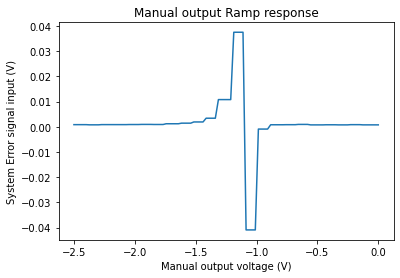

FC locking PID controller: Setting Output in Manual Mode in Volt to 0.0.


In [31]:
servo2.output_lowerlim=-10
servo2.output_upperlim=10
voltage_list = np.linspace(-2.5,0,100)
r = servo2.manual_sweep(voltage_list, start_pause=0.5, interval_pause=0.1)#03)
servo2.manual_output=0

In [30]:
servo2.manual_output_ramp=0
servo2.manual_output=-1

FC locking PID controller: Setting Output in Manual Mode in Volt to -1.0.


In [73]:
# import matplotlib.pyplot as plt
# plt.plot(voltage_list,r)
outoffset = -4
servo2.manual_output=outoffset

FC locking PID controller: Setting Output in Manual Mode in Volt to -4.0.


In [74]:
# outoffset = -1
servo2.setpoint = 0

servo2.outoffset= outoffset
servo2.outoffset_action=1
# servo2.prop_gain= -0.1
# servo2.prop_action=1
# servo2.intg_action=0
# servo2.derv_action=0
servo2.prop_gain=-0.2
servo2.intg_gain=2.5e4
servo2.derv_gain=1.5e-5
servo2.prop_action=1
servo2.intg_action=1
servo2.derv_action=0

servo2.manual_output=servo2.output_voltage
servo2.output_mode=1

FC locking PID controller: Setting Locking set point in Volt to 0.0.
FC locking PID controller: Setting Output offset in Volts to -4.0.
FC locking PID controller: Output Offset Calculator action is set to ON.
FC locking PID controller: Setting Proportional Gain in V/V to -0.2.
FC locking PID controller: Setting Integral Gain in 1/seconds to 25000.0.
FC locking PID controller: Setting Derivative Gain in seconds to 1.5e-05.
FC locking PID controller: Proportional Gain Calculator action is set to ON.
FC locking PID controller: Integral Gain Calculator action is set to ON.
FC locking PID controller: Derivative Gain Calculator action is set to OFF.
FC locking PID controller: Setting Output in Manual Mode in Volt to -3.996917.
FC locking PID controller: output mode 1 is understood as PID mode.
FC locking PID controller: PID output is turned ON.


In [12]:
servo2.setpoint = -0.02

FC locking PID controller: Setting Locking set point in Volt to -0.02.


In [60]:
# servo2.outoffset = -5.35#outoffset-0.1
# servo2.outoffset_action=1

# servo2.setpoint = -0.00

servo2.prop_gain=-0.2
servo2.intg_gain=2.5e4
servo2.derv_gain=1.5e-5
servo2.prop_action=1
servo2.intg_action=1
servo2.derv_action=0

FC locking PID controller: Setting Proportional Gain in V/V to -0.2.
FC locking PID controller: Setting Integral Gain in 1/seconds to 25000.0.
FC locking PID controller: Setting Derivative Gain in seconds to 1.5e-05.
FC locking PID controller: Proportional Gain Calculator action is set to ON.
FC locking PID controller: Integral Gain Calculator action is set to ON.
FC locking PID controller: Derivative Gain Calculator action is set to OFF.


In [38]:
# servo2.manual_output=servo2.output_voltage

servo2.output_mode=0

FC locking PID controller: output mode 0 is understood as Manual mode.
FC locking PID controller: PID output is turned OFF, output mode is turnd to Manual.


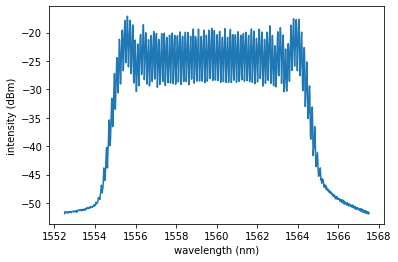

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220812-LockToFC\Cavity_output_FCT_20.49C_FCV_servooutput_RioT_22.86C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220812-LockToFC\Cavity_output_FCT_20.49C_FCV_servooutput_RioT_22.86C.txt


In [2]:
trace = 'b'
file_subfolder = '' # 'name\\'
filedir_global = r"Z:\Maodong\Projects\Keck\Compression Stage test\20220915" + "\\"
filename = f"disp2_{2.1:.2f}_pritel_{3.4:.2f}W"
osa.save_trace(trace, filedir_global+file_subfolder+filename)

Z:\Maodong\Projects\Keck\Keck Comb\LFC\Hardware\AndoOSA_AQ6315E.py:278: UserWarning: ANDO AQ-6315E Optical Spectrum Analyzer: Directory Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1 does not exist. Creating new directory.
  warnings.warn(self.devicename+": Directory "+filedir+" does not exist. Creating new directory.")


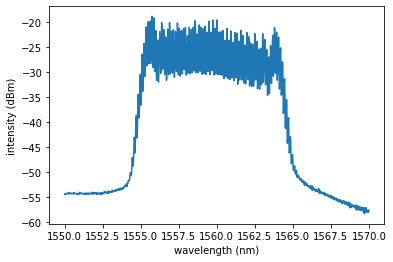

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00000_Cavity_output_FCT_20.52C_FCV_1.345_RioTset_22.86C_RioTact_23.18C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00000_Cavity_output_FCT_20.52C_FCV_1.345_RioTset_22.86C_RioTact_23.18C.txt


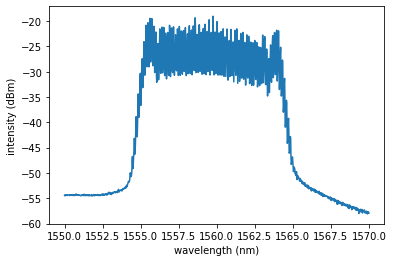

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00001_Cavity_output_FCT_20.52C_FCV_1.306_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00001_Cavity_output_FCT_20.52C_FCV_1.306_RioTset_22.86C_RioTact_23.14C.txt


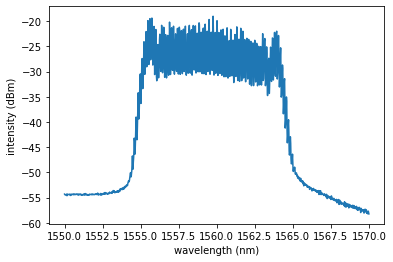

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00002_Cavity_output_FCT_20.52C_FCV_1.259_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00002_Cavity_output_FCT_20.52C_FCV_1.259_RioTset_22.86C_RioTact_23.15C.txt


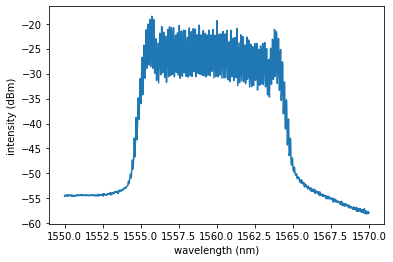

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00003_Cavity_output_FCT_20.52C_FCV_1.192_RioTset_22.86C_RioTact_23.17C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00003_Cavity_output_FCT_20.52C_FCV_1.192_RioTset_22.86C_RioTact_23.17C.txt


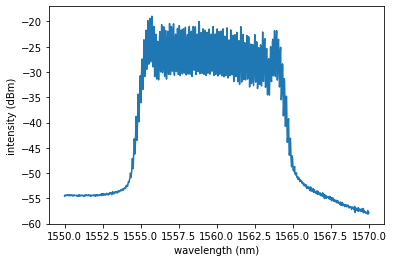

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00004_Cavity_output_FCT_20.52C_FCV_1.157_RioTset_22.86C_RioTact_23.17C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00004_Cavity_output_FCT_20.52C_FCV_1.157_RioTset_22.86C_RioTact_23.17C.txt


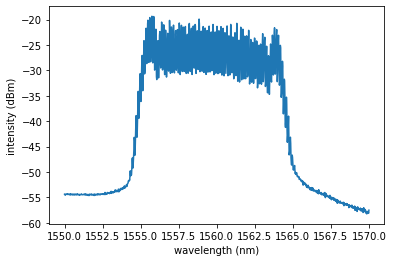

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00005_Cavity_output_FCT_20.52C_FCV_1.167_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00005_Cavity_output_FCT_20.52C_FCV_1.167_RioTset_22.86C_RioTact_23.16C.txt


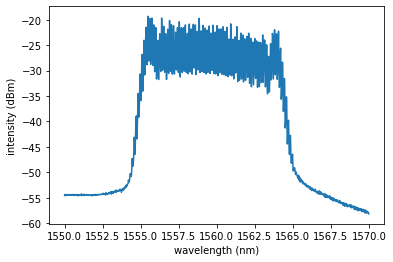

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00006_Cavity_output_FCT_20.52C_FCV_1.245_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00006_Cavity_output_FCT_20.52C_FCV_1.245_RioTset_22.86C_RioTact_23.16C.txt


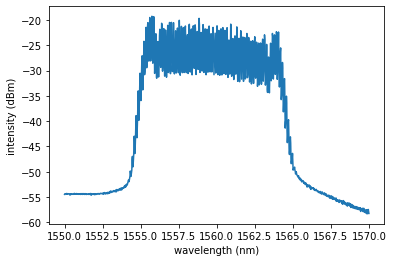

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00007_Cavity_output_FCT_20.52C_FCV_1.238_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00007_Cavity_output_FCT_20.52C_FCV_1.238_RioTset_22.86C_RioTact_23.15C.txt


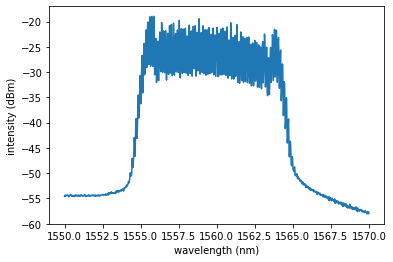

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00008_Cavity_output_FCT_20.52C_FCV_1.291_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00008_Cavity_output_FCT_20.52C_FCV_1.291_RioTset_22.86C_RioTact_23.16C.txt


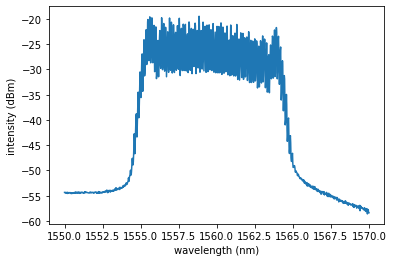

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00009_Cavity_output_FCT_20.52C_FCV_1.276_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00009_Cavity_output_FCT_20.52C_FCV_1.276_RioTset_22.86C_RioTact_23.16C.txt


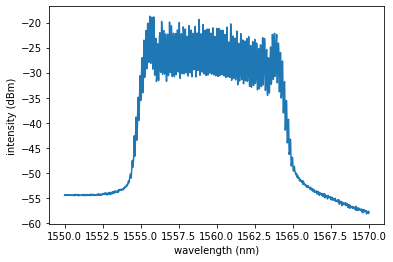

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00010_Cavity_output_FCT_20.52C_FCV_1.316_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00010_Cavity_output_FCT_20.52C_FCV_1.316_RioTset_22.86C_RioTact_23.16C.txt


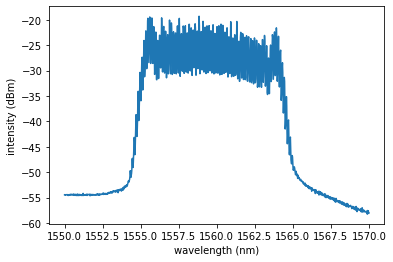

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00011_Cavity_output_FCT_20.52C_FCV_1.304_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00011_Cavity_output_FCT_20.52C_FCV_1.304_RioTset_22.86C_RioTact_23.16C.txt


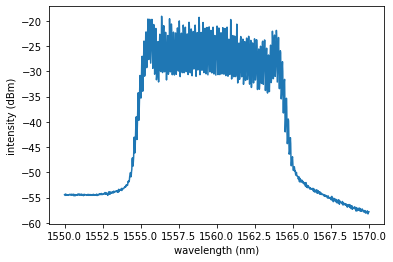

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00012_Cavity_output_FCT_20.52C_FCV_1.304_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00012_Cavity_output_FCT_20.52C_FCV_1.304_RioTset_22.86C_RioTact_23.16C.txt


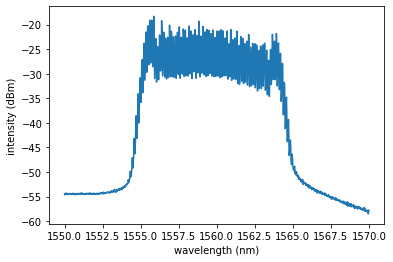

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00013_Cavity_output_FCT_20.52C_FCV_1.377_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00013_Cavity_output_FCT_20.52C_FCV_1.377_RioTset_22.86C_RioTact_23.14C.txt


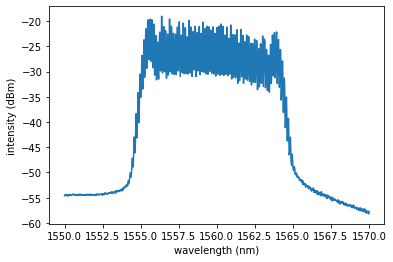

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00014_Cavity_output_FCT_20.52C_FCV_1.397_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00014_Cavity_output_FCT_20.52C_FCV_1.397_RioTset_22.86C_RioTact_23.16C.txt


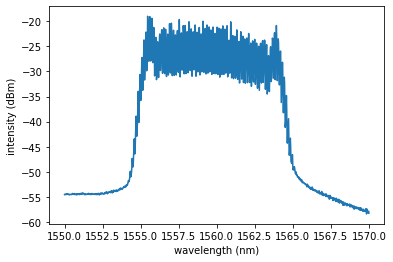

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00015_Cavity_output_FCT_20.52C_FCV_1.416_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00015_Cavity_output_FCT_20.52C_FCV_1.416_RioTset_22.86C_RioTact_23.16C.txt


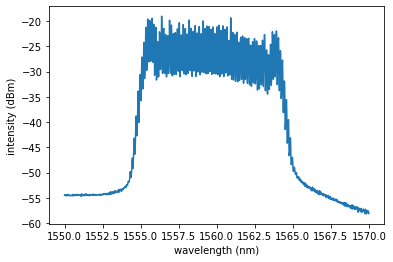

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00016_Cavity_output_FCT_20.52C_FCV_1.454_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00016_Cavity_output_FCT_20.52C_FCV_1.454_RioTset_22.86C_RioTact_23.15C.txt


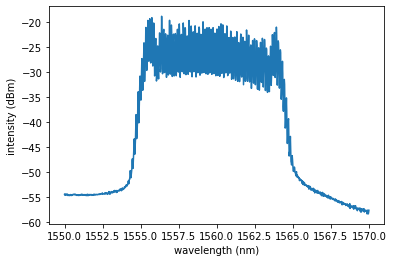

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00017_Cavity_output_FCT_20.52C_FCV_1.442_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00017_Cavity_output_FCT_20.52C_FCV_1.442_RioTset_22.86C_RioTact_23.15C.txt


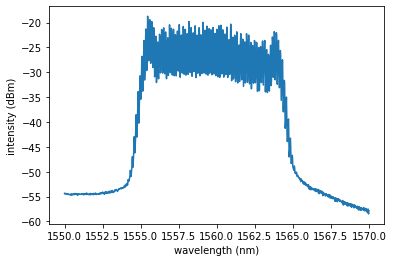

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00018_Cavity_output_FCT_20.52C_FCV_1.463_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00018_Cavity_output_FCT_20.52C_FCV_1.463_RioTset_22.86C_RioTact_23.15C.txt


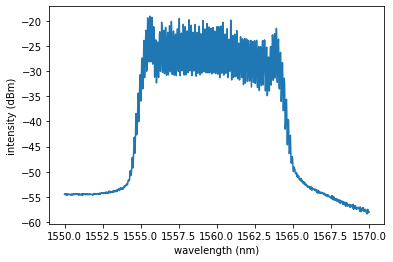

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00019_Cavity_output_FCT_20.52C_FCV_1.470_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00019_Cavity_output_FCT_20.52C_FCV_1.470_RioTset_22.86C_RioTact_23.16C.txt


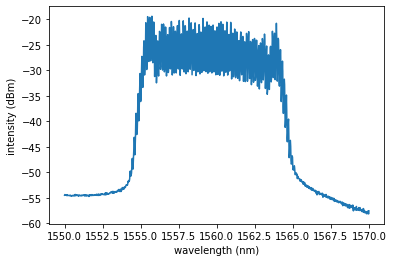

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00020_Cavity_output_FCT_20.52C_FCV_1.516_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00020_Cavity_output_FCT_20.52C_FCV_1.516_RioTset_22.86C_RioTact_23.16C.txt


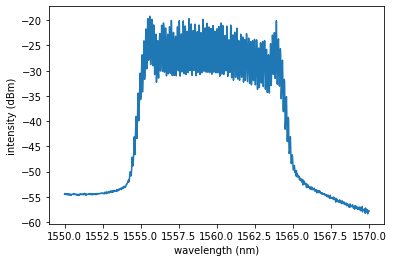

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00021_Cavity_output_FCT_20.52C_FCV_1.499_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00021_Cavity_output_FCT_20.52C_FCV_1.499_RioTset_22.86C_RioTact_23.16C.txt


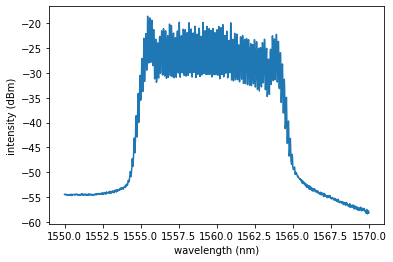

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00022_Cavity_output_FCT_20.52C_FCV_1.573_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00022_Cavity_output_FCT_20.52C_FCV_1.573_RioTset_22.86C_RioTact_23.16C.txt


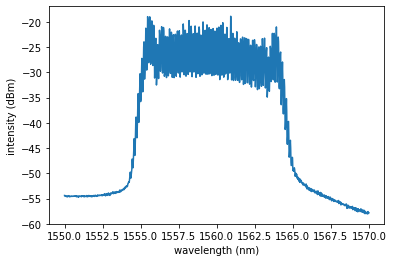

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00023_Cavity_output_FCT_20.52C_FCV_1.596_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00023_Cavity_output_FCT_20.52C_FCV_1.596_RioTset_22.86C_RioTact_23.16C.txt


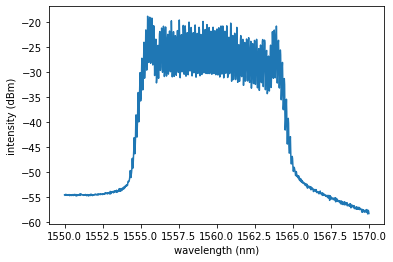

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00024_Cavity_output_FCT_20.52C_FCV_1.646_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00024_Cavity_output_FCT_20.52C_FCV_1.646_RioTset_22.86C_RioTact_23.16C.txt


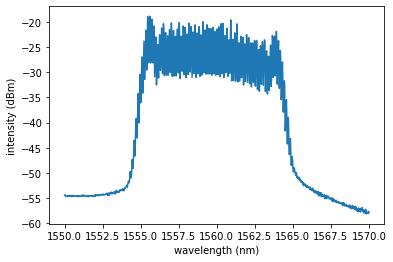

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00025_Cavity_output_FCT_20.52C_FCV_1.705_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00025_Cavity_output_FCT_20.52C_FCV_1.705_RioTset_22.86C_RioTact_23.15C.txt


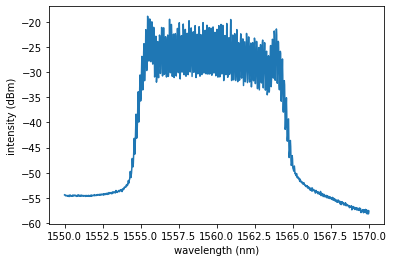

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00026_Cavity_output_FCT_20.52C_FCV_1.743_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00026_Cavity_output_FCT_20.52C_FCV_1.743_RioTset_22.86C_RioTact_23.14C.txt


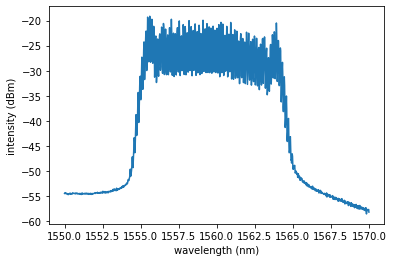

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00027_Cavity_output_FCT_20.52C_FCV_1.734_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00027_Cavity_output_FCT_20.52C_FCV_1.734_RioTset_22.86C_RioTact_23.16C.txt


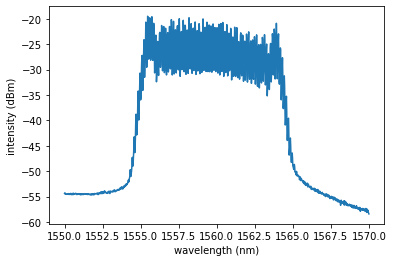

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00028_Cavity_output_FCT_20.52C_FCV_1.805_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00028_Cavity_output_FCT_20.52C_FCV_1.805_RioTset_22.86C_RioTact_23.15C.txt


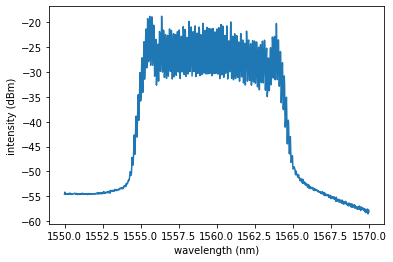

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00029_Cavity_output_FCT_20.52C_FCV_1.836_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00029_Cavity_output_FCT_20.52C_FCV_1.836_RioTset_22.86C_RioTact_23.15C.txt


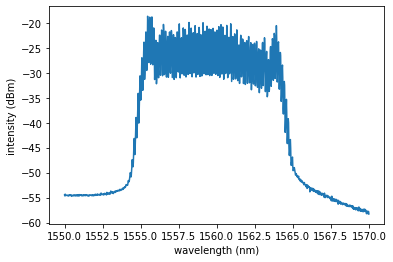

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00030_Cavity_output_FCT_20.52C_FCV_1.902_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00030_Cavity_output_FCT_20.52C_FCV_1.902_RioTset_22.86C_RioTact_23.15C.txt


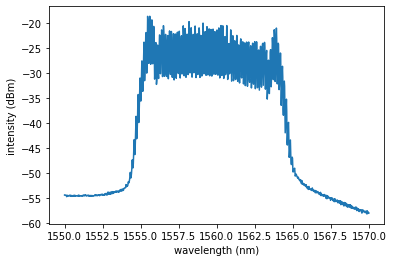

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00031_Cavity_output_FCT_20.52C_FCV_1.917_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00031_Cavity_output_FCT_20.52C_FCV_1.917_RioTset_22.86C_RioTact_23.16C.txt


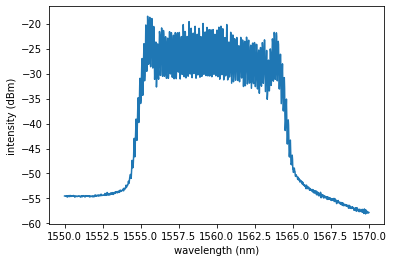

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00032_Cavity_output_FCT_20.52C_FCV_1.991_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00032_Cavity_output_FCT_20.52C_FCV_1.991_RioTset_22.86C_RioTact_23.15C.txt


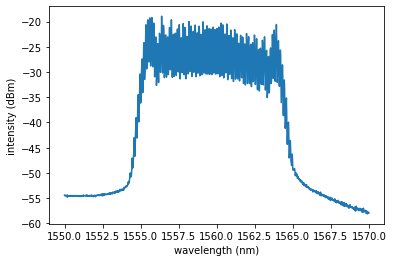

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00033_Cavity_output_FCT_20.52C_FCV_1.998_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00033_Cavity_output_FCT_20.52C_FCV_1.998_RioTset_22.86C_RioTact_23.15C.txt


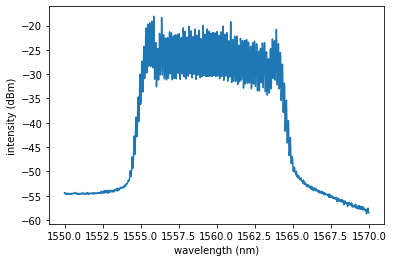

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00034_Cavity_output_FCT_20.52C_FCV_2.002_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00034_Cavity_output_FCT_20.52C_FCV_2.002_RioTset_22.86C_RioTact_23.15C.txt


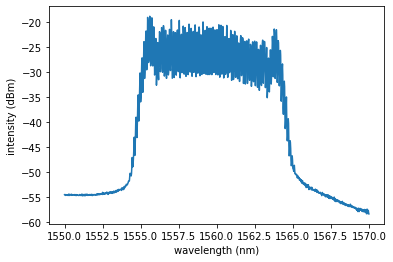

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00035_Cavity_output_FCT_20.52C_FCV_2.068_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00035_Cavity_output_FCT_20.52C_FCV_2.068_RioTset_22.86C_RioTact_23.15C.txt


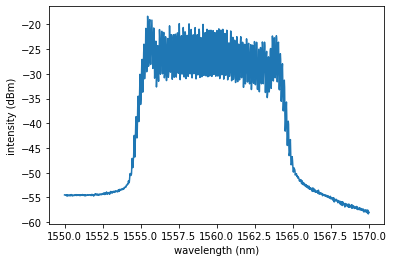

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00036_Cavity_output_FCT_20.52C_FCV_2.109_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00036_Cavity_output_FCT_20.52C_FCV_2.109_RioTset_22.86C_RioTact_23.15C.txt


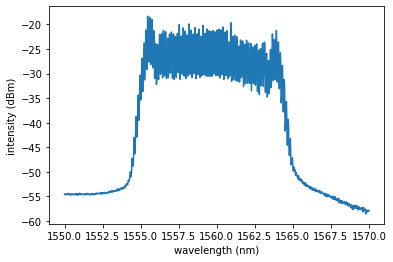

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00037_Cavity_output_FCT_20.52C_FCV_2.139_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00037_Cavity_output_FCT_20.52C_FCV_2.139_RioTset_22.86C_RioTact_23.15C.txt


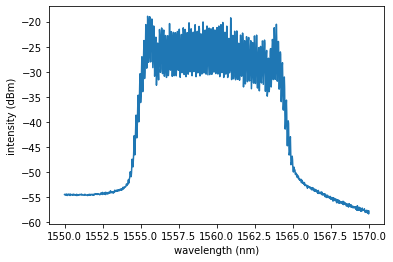

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00038_Cavity_output_FCT_20.52C_FCV_2.153_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00038_Cavity_output_FCT_20.52C_FCV_2.153_RioTset_22.86C_RioTact_23.15C.txt


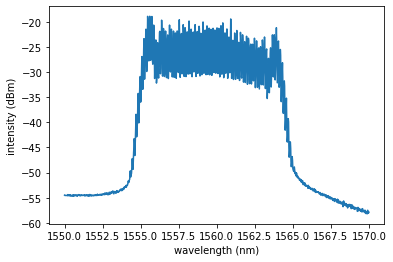

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00039_Cavity_output_FCT_20.52C_FCV_2.195_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00039_Cavity_output_FCT_20.52C_FCV_2.195_RioTset_22.86C_RioTact_23.16C.txt


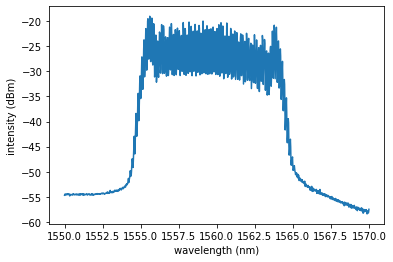

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00040_Cavity_output_FCT_20.52C_FCV_2.272_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00040_Cavity_output_FCT_20.52C_FCV_2.272_RioTset_22.86C_RioTact_23.15C.txt


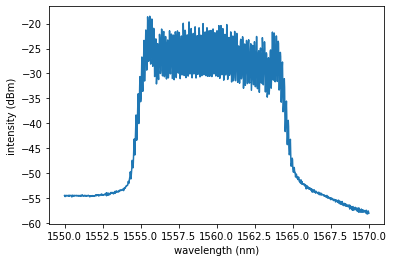

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00041_Cavity_output_FCT_20.52C_FCV_2.297_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00041_Cavity_output_FCT_20.52C_FCV_2.297_RioTset_22.86C_RioTact_23.14C.txt


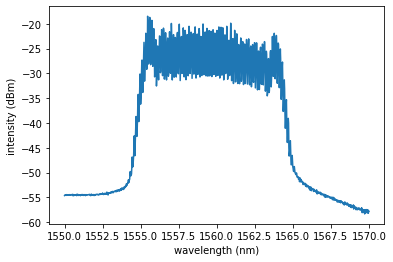

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00042_Cavity_output_FCT_20.52C_FCV_2.348_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00042_Cavity_output_FCT_20.52C_FCV_2.348_RioTset_22.86C_RioTact_23.16C.txt


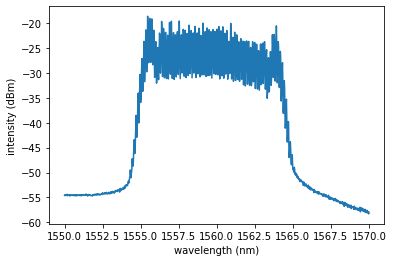

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00043_Cavity_output_FCT_20.52C_FCV_2.350_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00043_Cavity_output_FCT_20.52C_FCV_2.350_RioTset_22.86C_RioTact_23.15C.txt


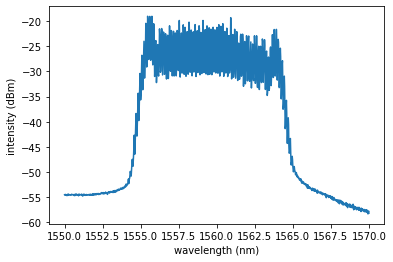

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00044_Cavity_output_FCT_20.52C_FCV_2.366_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00044_Cavity_output_FCT_20.52C_FCV_2.366_RioTset_22.86C_RioTact_23.14C.txt


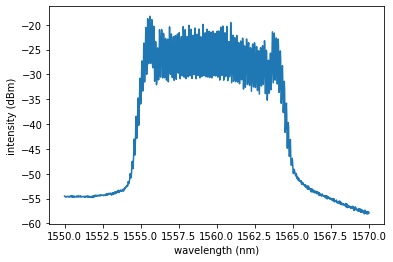

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00045_Cavity_output_FCT_20.52C_FCV_2.388_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00045_Cavity_output_FCT_20.52C_FCV_2.388_RioTset_22.86C_RioTact_23.16C.txt


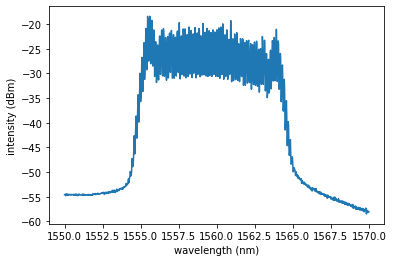

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00046_Cavity_output_FCT_20.52C_FCV_2.433_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00046_Cavity_output_FCT_20.52C_FCV_2.433_RioTset_22.86C_RioTact_23.15C.txt


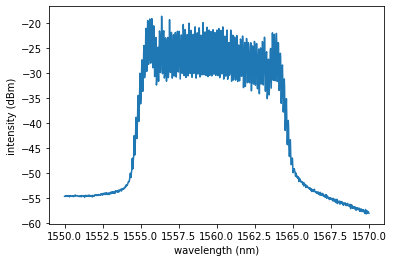

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00047_Cavity_output_FCT_20.52C_FCV_2.495_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00047_Cavity_output_FCT_20.52C_FCV_2.495_RioTset_22.86C_RioTact_23.15C.txt


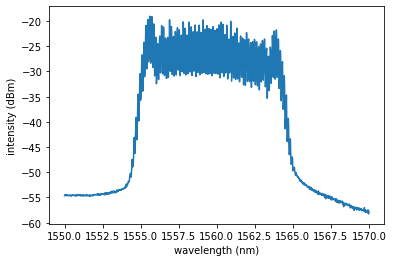

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00048_Cavity_output_FCT_20.52C_FCV_2.490_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00048_Cavity_output_FCT_20.52C_FCV_2.490_RioTset_22.86C_RioTact_23.15C.txt


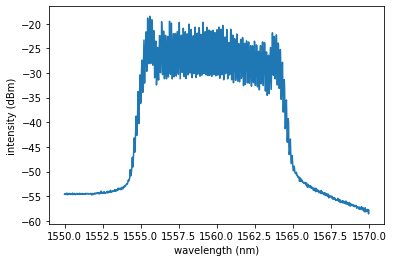

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00049_Cavity_output_FCT_20.52C_FCV_2.537_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00049_Cavity_output_FCT_20.52C_FCV_2.537_RioTset_22.86C_RioTact_23.15C.txt


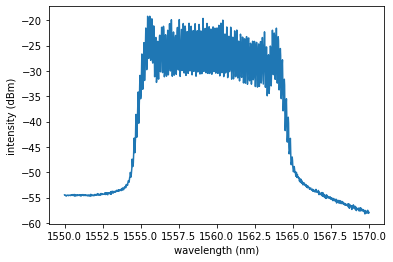

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00050_Cavity_output_FCT_20.52C_FCV_2.588_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00050_Cavity_output_FCT_20.52C_FCV_2.588_RioTset_22.86C_RioTact_23.15C.txt


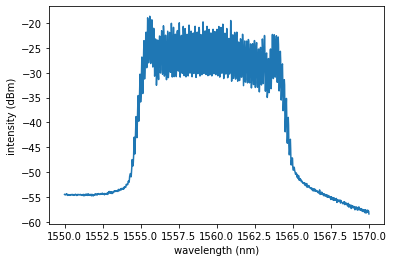

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00051_Cavity_output_FCT_20.52C_FCV_2.677_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00051_Cavity_output_FCT_20.52C_FCV_2.677_RioTset_22.86C_RioTact_23.16C.txt


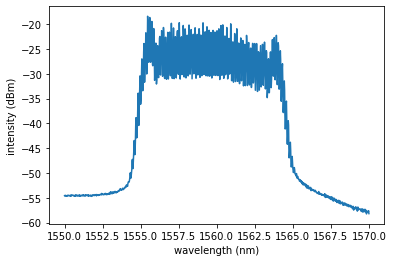

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00052_Cavity_output_FCT_20.52C_FCV_2.681_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00052_Cavity_output_FCT_20.52C_FCV_2.681_RioTset_22.86C_RioTact_23.15C.txt


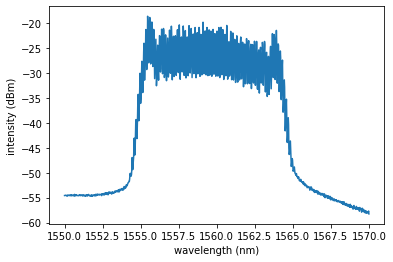

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00053_Cavity_output_FCT_20.52C_FCV_2.716_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00053_Cavity_output_FCT_20.52C_FCV_2.716_RioTset_22.86C_RioTact_23.16C.txt


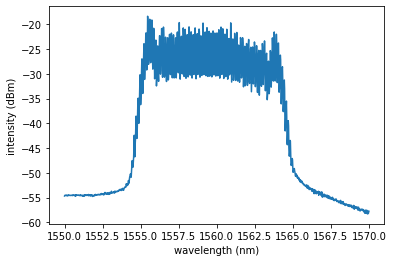

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00054_Cavity_output_FCT_20.52C_FCV_2.762_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00054_Cavity_output_FCT_20.52C_FCV_2.762_RioTset_22.86C_RioTact_23.15C.txt


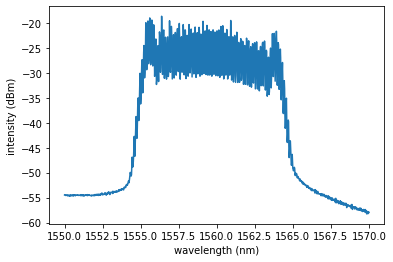

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00055_Cavity_output_FCT_20.52C_FCV_2.774_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00055_Cavity_output_FCT_20.52C_FCV_2.774_RioTset_22.86C_RioTact_23.14C.txt


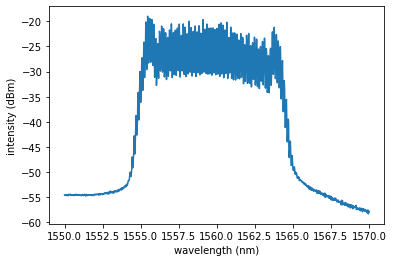

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00056_Cavity_output_FCT_20.52C_FCV_2.812_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00056_Cavity_output_FCT_20.52C_FCV_2.812_RioTset_22.86C_RioTact_23.15C.txt


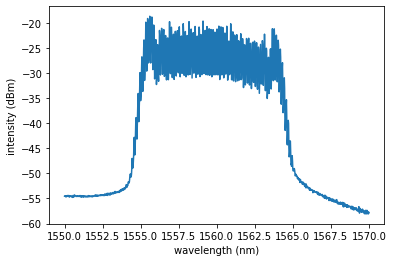

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00057_Cavity_output_FCT_20.52C_FCV_2.819_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00057_Cavity_output_FCT_20.52C_FCV_2.819_RioTset_22.86C_RioTact_23.15C.txt


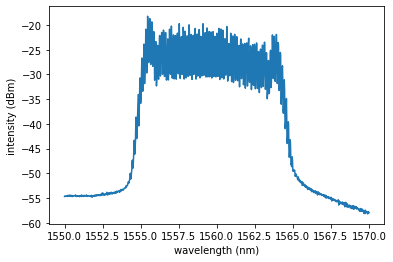

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00058_Cavity_output_FCT_20.52C_FCV_2.859_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00058_Cavity_output_FCT_20.52C_FCV_2.859_RioTset_22.86C_RioTact_23.15C.txt


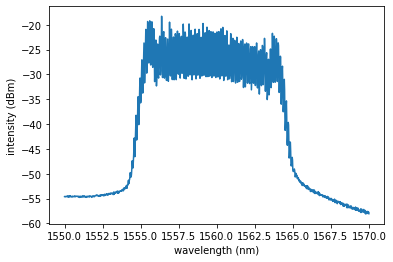

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00059_Cavity_output_FCT_20.52C_FCV_2.964_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00059_Cavity_output_FCT_20.52C_FCV_2.964_RioTset_22.86C_RioTact_23.15C.txt


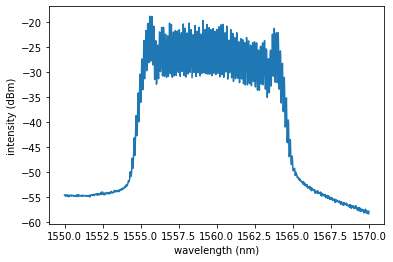

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00060_Cavity_output_FCT_20.52C_FCV_2.994_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00060_Cavity_output_FCT_20.52C_FCV_2.994_RioTset_22.86C_RioTact_23.15C.txt


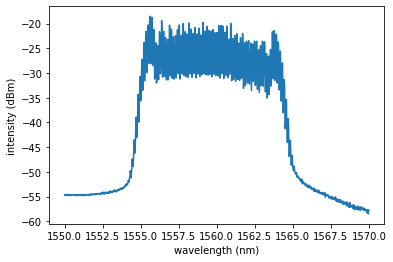

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00061_Cavity_output_FCT_20.52C_FCV_3.019_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00061_Cavity_output_FCT_20.52C_FCV_3.019_RioTset_22.86C_RioTact_23.15C.txt


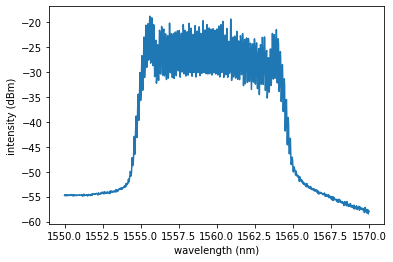

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00062_Cavity_output_FCT_20.52C_FCV_3.057_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00062_Cavity_output_FCT_20.52C_FCV_3.057_RioTset_22.86C_RioTact_23.14C.txt


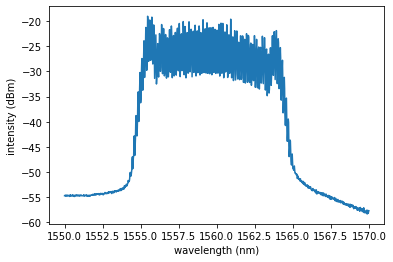

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00063_Cavity_output_FCT_20.52C_FCV_3.109_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00063_Cavity_output_FCT_20.52C_FCV_3.109_RioTset_22.86C_RioTact_23.15C.txt


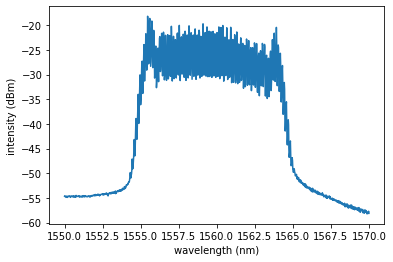

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00064_Cavity_output_FCT_20.52C_FCV_3.128_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00064_Cavity_output_FCT_20.52C_FCV_3.128_RioTset_22.86C_RioTact_23.16C.txt


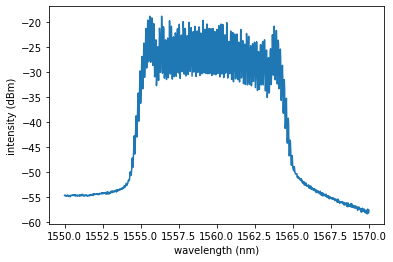

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00065_Cavity_output_FCT_20.52C_FCV_3.185_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00065_Cavity_output_FCT_20.52C_FCV_3.185_RioTset_22.86C_RioTact_23.14C.txt


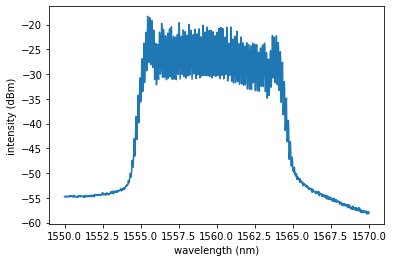

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00066_Cavity_output_FCT_20.52C_FCV_3.167_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00066_Cavity_output_FCT_20.52C_FCV_3.167_RioTset_22.86C_RioTact_23.15C.txt


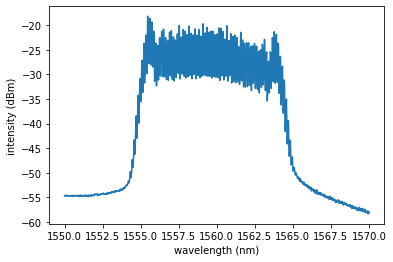

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00067_Cavity_output_FCT_20.52C_FCV_3.267_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00067_Cavity_output_FCT_20.52C_FCV_3.267_RioTset_22.86C_RioTact_23.15C.txt


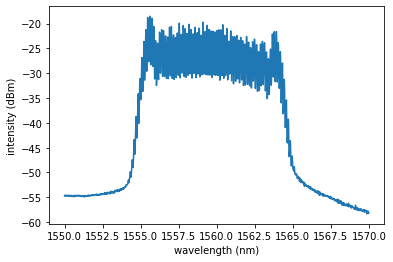

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00068_Cavity_output_FCT_20.52C_FCV_3.272_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00068_Cavity_output_FCT_20.52C_FCV_3.272_RioTset_22.86C_RioTact_23.16C.txt


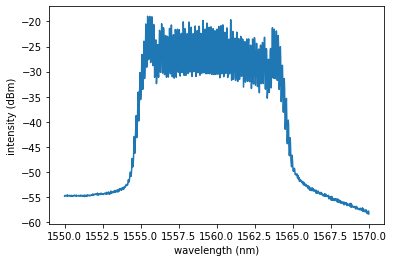

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00069_Cavity_output_FCT_20.52C_FCV_3.400_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00069_Cavity_output_FCT_20.52C_FCV_3.400_RioTset_22.86C_RioTact_23.14C.txt


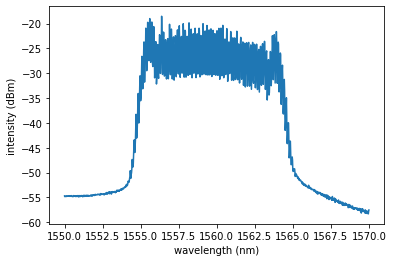

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00070_Cavity_output_FCT_20.52C_FCV_3.411_RioTset_22.86C_RioTact_23.17C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00070_Cavity_output_FCT_20.52C_FCV_3.411_RioTset_22.86C_RioTact_23.17C.txt


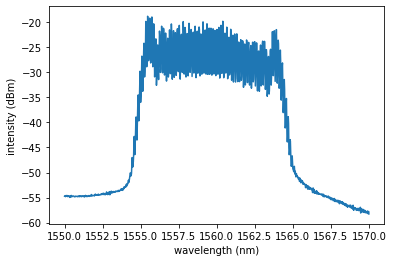

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00071_Cavity_output_FCT_20.52C_FCV_3.372_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00071_Cavity_output_FCT_20.52C_FCV_3.372_RioTset_22.86C_RioTact_23.16C.txt


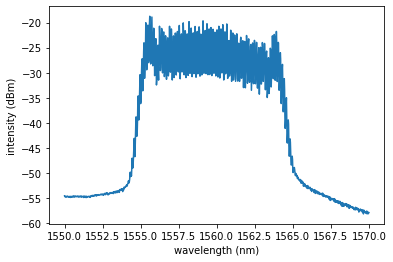

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00072_Cavity_output_FCT_20.52C_FCV_3.440_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00072_Cavity_output_FCT_20.52C_FCV_3.440_RioTset_22.86C_RioTact_23.15C.txt


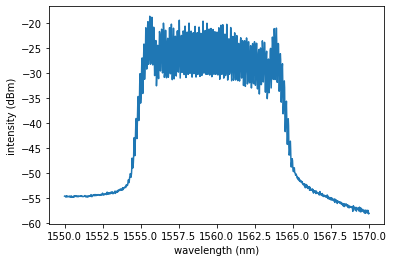

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00073_Cavity_output_FCT_20.52C_FCV_3.433_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00073_Cavity_output_FCT_20.52C_FCV_3.433_RioTset_22.86C_RioTact_23.15C.txt


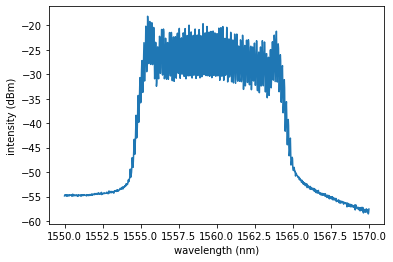

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00074_Cavity_output_FCT_20.52C_FCV_3.546_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00074_Cavity_output_FCT_20.52C_FCV_3.546_RioTset_22.86C_RioTact_23.14C.txt


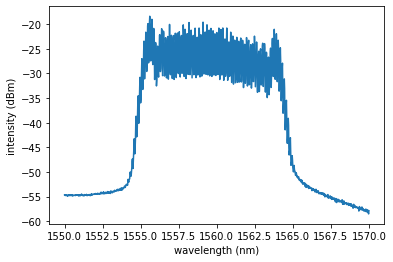

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00075_Cavity_output_FCT_20.52C_FCV_3.556_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00075_Cavity_output_FCT_20.52C_FCV_3.556_RioTset_22.86C_RioTact_23.15C.txt


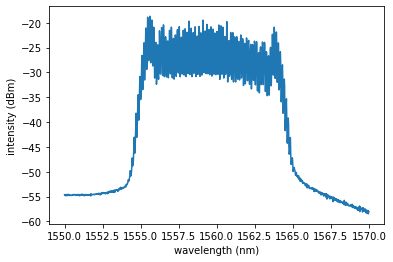

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00076_Cavity_output_FCT_20.52C_FCV_3.586_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00076_Cavity_output_FCT_20.52C_FCV_3.586_RioTset_22.86C_RioTact_23.15C.txt


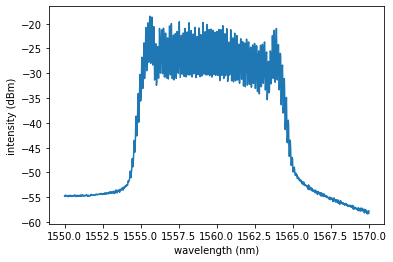

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00077_Cavity_output_FCT_20.52C_FCV_3.626_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00077_Cavity_output_FCT_20.52C_FCV_3.626_RioTset_22.86C_RioTact_23.15C.txt


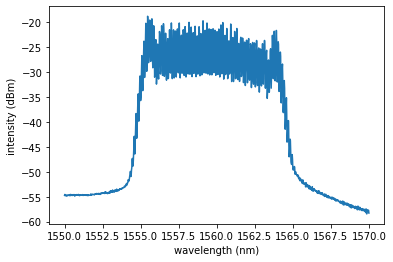

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00078_Cavity_output_FCT_20.52C_FCV_3.597_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00078_Cavity_output_FCT_20.52C_FCV_3.597_RioTset_22.86C_RioTact_23.16C.txt


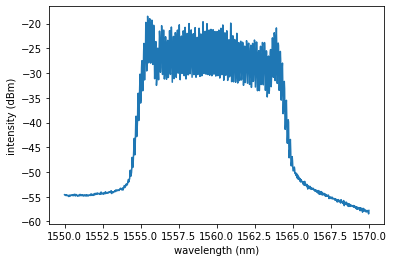

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00079_Cavity_output_FCT_20.52C_FCV_3.680_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00079_Cavity_output_FCT_20.52C_FCV_3.680_RioTset_22.86C_RioTact_23.14C.txt


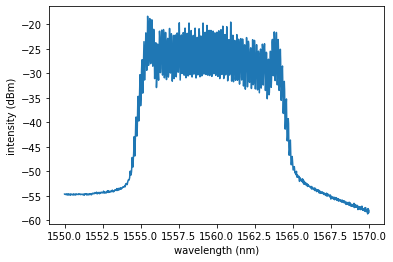

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00080_Cavity_output_FCT_20.52C_FCV_3.718_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00080_Cavity_output_FCT_20.52C_FCV_3.718_RioTset_22.86C_RioTact_23.15C.txt


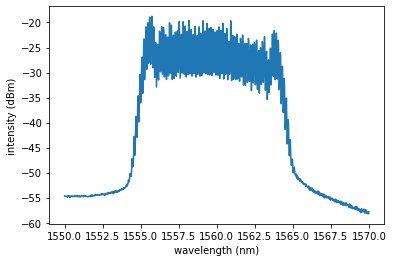

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00081_Cavity_output_FCT_20.52C_FCV_3.753_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00081_Cavity_output_FCT_20.52C_FCV_3.753_RioTset_22.86C_RioTact_23.15C.txt


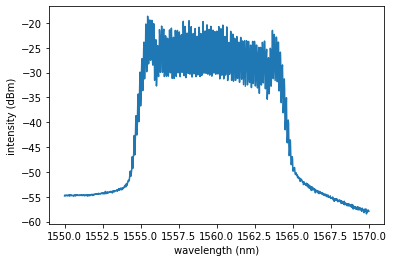

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00082_Cavity_output_FCT_20.52C_FCV_3.741_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00082_Cavity_output_FCT_20.52C_FCV_3.741_RioTset_22.86C_RioTact_23.15C.txt


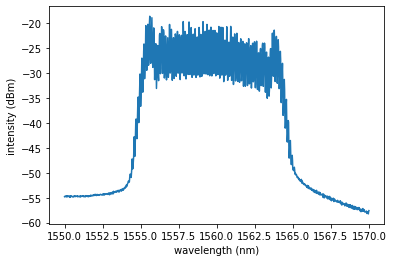

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00083_Cavity_output_FCT_20.52C_FCV_3.874_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00083_Cavity_output_FCT_20.52C_FCV_3.874_RioTset_22.86C_RioTact_23.15C.txt


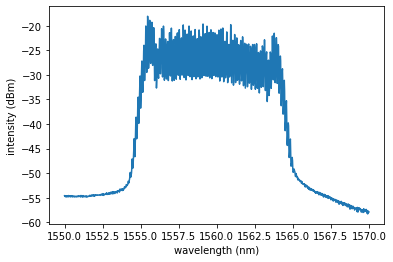

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00084_Cavity_output_FCT_20.52C_FCV_3.861_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00084_Cavity_output_FCT_20.52C_FCV_3.861_RioTset_22.86C_RioTact_23.15C.txt


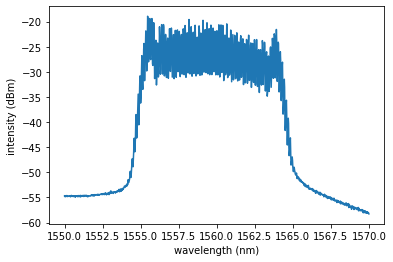

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00085_Cavity_output_FCT_20.52C_FCV_3.927_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00085_Cavity_output_FCT_20.52C_FCV_3.927_RioTset_22.86C_RioTact_23.16C.txt


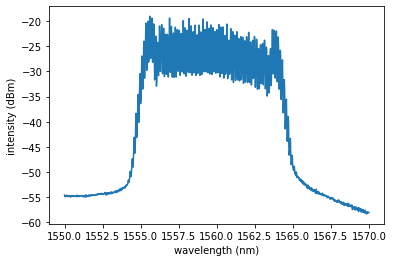

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00086_Cavity_output_FCT_20.52C_FCV_3.910_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00086_Cavity_output_FCT_20.52C_FCV_3.910_RioTset_22.86C_RioTact_23.15C.txt


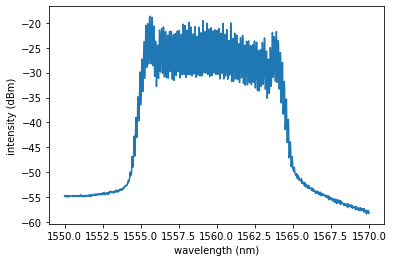

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00087_Cavity_output_FCT_20.52C_FCV_3.932_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00087_Cavity_output_FCT_20.52C_FCV_3.932_RioTset_22.86C_RioTact_23.14C.txt


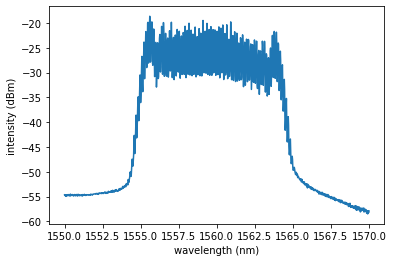

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00088_Cavity_output_FCT_20.52C_FCV_4.055_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00088_Cavity_output_FCT_20.52C_FCV_4.055_RioTset_22.86C_RioTact_23.16C.txt


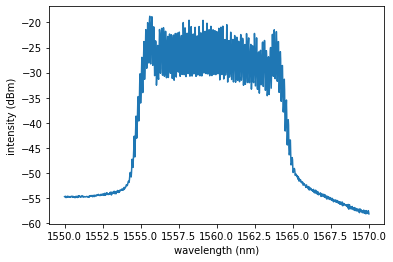

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00089_Cavity_output_FCT_20.52C_FCV_4.071_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00089_Cavity_output_FCT_20.52C_FCV_4.071_RioTset_22.86C_RioTact_23.15C.txt


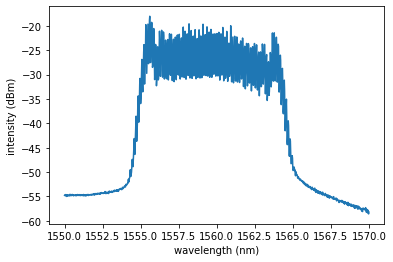

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00090_Cavity_output_FCT_20.52C_FCV_4.124_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00090_Cavity_output_FCT_20.52C_FCV_4.124_RioTset_22.86C_RioTact_23.14C.txt


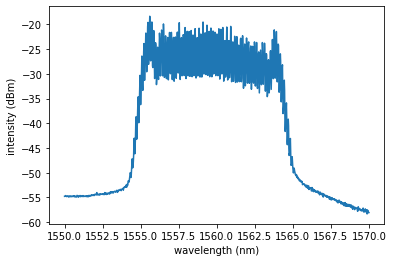

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00091_Cavity_output_FCT_20.52C_FCV_4.142_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00091_Cavity_output_FCT_20.52C_FCV_4.142_RioTset_22.86C_RioTact_23.13C.txt


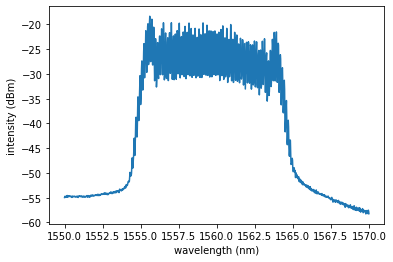

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00092_Cavity_output_FCT_20.52C_FCV_4.127_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00092_Cavity_output_FCT_20.52C_FCV_4.127_RioTset_22.86C_RioTact_23.15C.txt


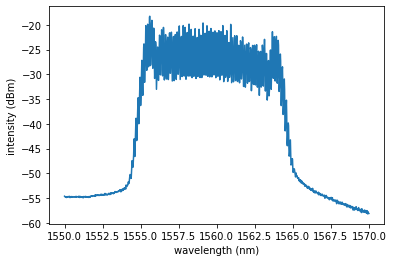

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00093_Cavity_output_FCT_20.52C_FCV_4.219_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00093_Cavity_output_FCT_20.52C_FCV_4.219_RioTset_22.86C_RioTact_23.15C.txt


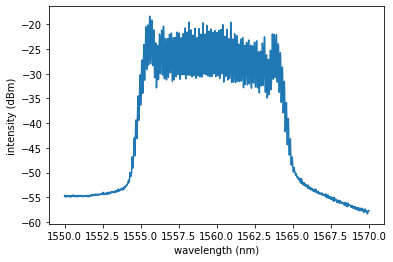

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00094_Cavity_output_FCT_20.52C_FCV_4.240_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00094_Cavity_output_FCT_20.52C_FCV_4.240_RioTset_22.86C_RioTact_23.15C.txt


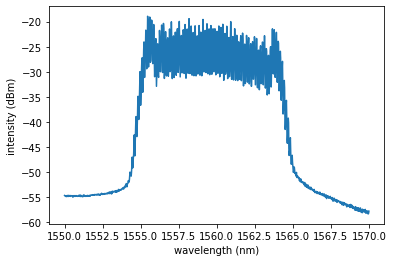

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00095_Cavity_output_FCT_20.52C_FCV_4.261_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00095_Cavity_output_FCT_20.52C_FCV_4.261_RioTset_22.86C_RioTact_23.14C.txt


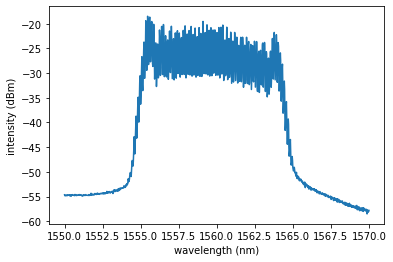

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00096_Cavity_output_FCT_20.52C_FCV_4.354_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00096_Cavity_output_FCT_20.52C_FCV_4.354_RioTset_22.86C_RioTact_23.15C.txt


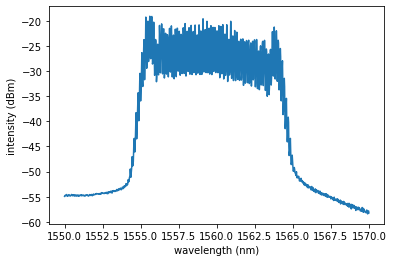

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00097_Cavity_output_FCT_20.52C_FCV_4.379_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00097_Cavity_output_FCT_20.52C_FCV_4.379_RioTset_22.86C_RioTact_23.14C.txt


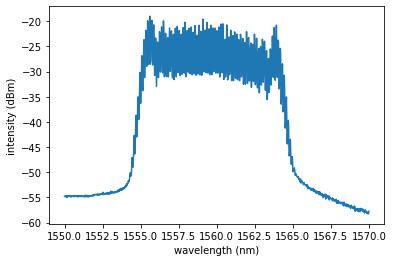

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00098_Cavity_output_FCT_20.52C_FCV_4.448_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00098_Cavity_output_FCT_20.52C_FCV_4.448_RioTset_22.86C_RioTact_23.14C.txt


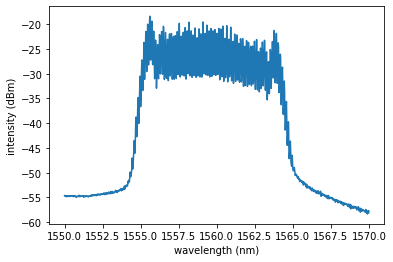

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00099_Cavity_output_FCT_20.52C_FCV_4.463_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00099_Cavity_output_FCT_20.52C_FCV_4.463_RioTset_22.86C_RioTact_23.15C.txt


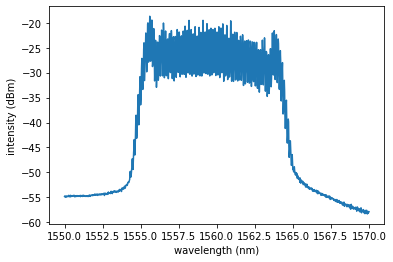

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00100_Cavity_output_FCT_20.52C_FCV_4.489_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00100_Cavity_output_FCT_20.52C_FCV_4.489_RioTset_22.86C_RioTact_23.16C.txt


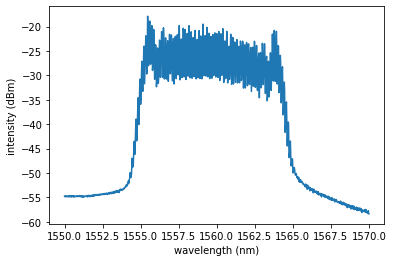

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00101_Cavity_output_FCT_20.52C_FCV_4.506_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00101_Cavity_output_FCT_20.52C_FCV_4.506_RioTset_22.86C_RioTact_23.14C.txt


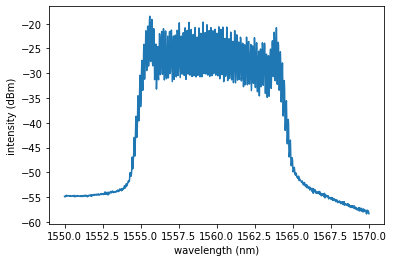

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00102_Cavity_output_FCT_20.52C_FCV_4.564_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00102_Cavity_output_FCT_20.52C_FCV_4.564_RioTset_22.86C_RioTact_23.14C.txt


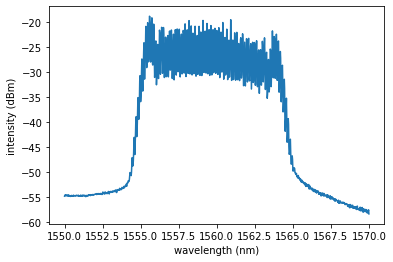

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00103_Cavity_output_FCT_20.52C_FCV_4.579_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00103_Cavity_output_FCT_20.52C_FCV_4.579_RioTset_22.86C_RioTact_23.15C.txt


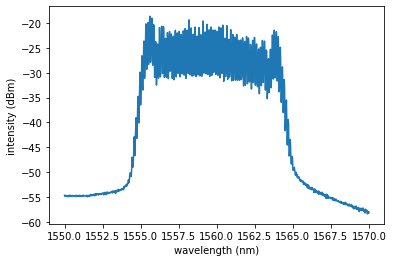

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00104_Cavity_output_FCT_20.52C_FCV_4.651_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00104_Cavity_output_FCT_20.52C_FCV_4.651_RioTset_22.86C_RioTact_23.15C.txt


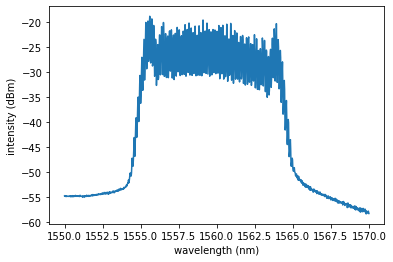

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00105_Cavity_output_FCT_20.52C_FCV_4.726_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00105_Cavity_output_FCT_20.52C_FCV_4.726_RioTset_22.86C_RioTact_23.13C.txt


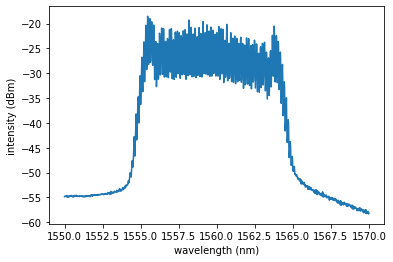

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00106_Cavity_output_FCT_20.52C_FCV_4.691_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00106_Cavity_output_FCT_20.52C_FCV_4.691_RioTset_22.86C_RioTact_23.15C.txt


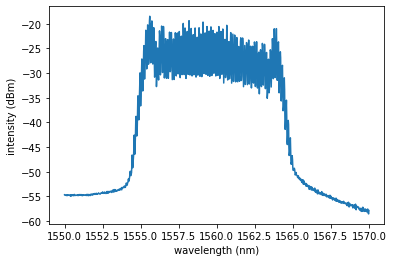

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00107_Cavity_output_FCT_20.52C_FCV_4.755_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00107_Cavity_output_FCT_20.52C_FCV_4.755_RioTset_22.86C_RioTact_23.15C.txt


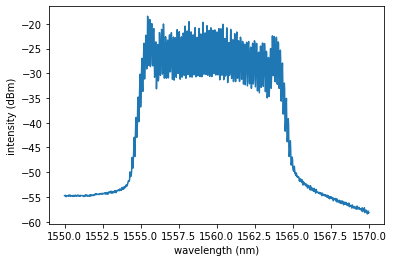

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00108_Cavity_output_FCT_20.52C_FCV_4.769_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00108_Cavity_output_FCT_20.52C_FCV_4.769_RioTset_22.86C_RioTact_23.14C.txt


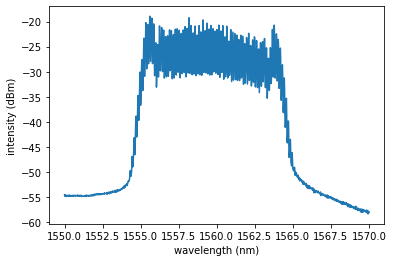

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00109_Cavity_output_FCT_20.52C_FCV_4.852_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00109_Cavity_output_FCT_20.52C_FCV_4.852_RioTset_22.86C_RioTact_23.15C.txt


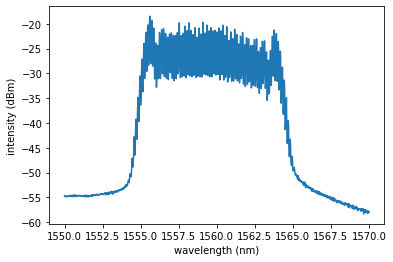

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00110_Cavity_output_FCT_20.52C_FCV_4.824_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00110_Cavity_output_FCT_20.52C_FCV_4.824_RioTset_22.86C_RioTact_23.14C.txt


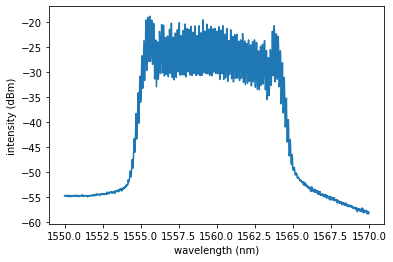

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00111_Cavity_output_FCT_20.52C_FCV_4.900_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00111_Cavity_output_FCT_20.52C_FCV_4.900_RioTset_22.86C_RioTact_23.15C.txt


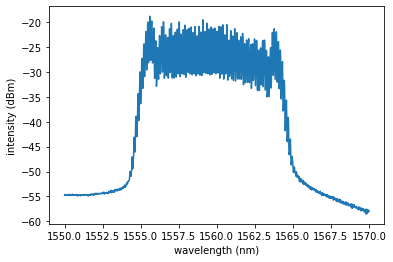

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00112_Cavity_output_FCT_20.52C_FCV_4.911_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00112_Cavity_output_FCT_20.52C_FCV_4.911_RioTset_22.86C_RioTact_23.16C.txt


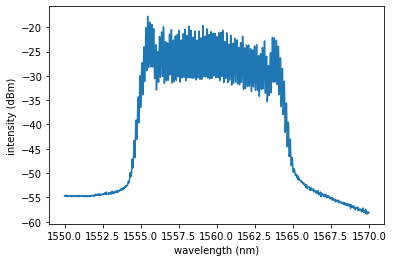

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00113_Cavity_output_FCT_20.52C_FCV_4.913_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00113_Cavity_output_FCT_20.52C_FCV_4.913_RioTset_22.86C_RioTact_23.15C.txt


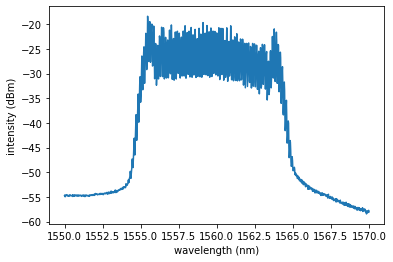

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00114_Cavity_output_FCT_20.52C_FCV_5.006_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00114_Cavity_output_FCT_20.52C_FCV_5.006_RioTset_22.86C_RioTact_23.16C.txt


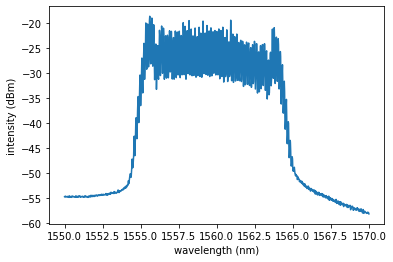

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00115_Cavity_output_FCT_20.52C_FCV_5.009_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00115_Cavity_output_FCT_20.52C_FCV_5.009_RioTset_22.86C_RioTact_23.15C.txt


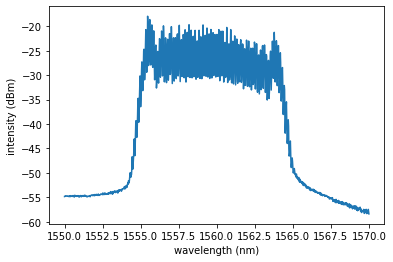

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00116_Cavity_output_FCT_20.52C_FCV_5.085_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00116_Cavity_output_FCT_20.52C_FCV_5.085_RioTset_22.86C_RioTact_23.14C.txt


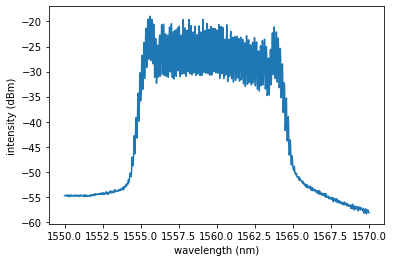

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00117_Cavity_output_FCT_20.52C_FCV_5.112_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00117_Cavity_output_FCT_20.52C_FCV_5.112_RioTset_22.86C_RioTact_23.16C.txt


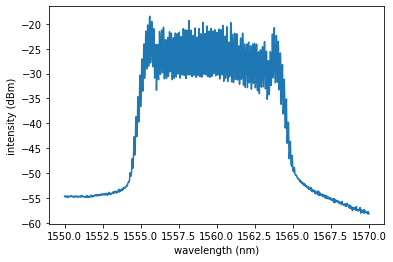

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00118_Cavity_output_FCT_20.52C_FCV_5.082_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00118_Cavity_output_FCT_20.52C_FCV_5.082_RioTset_22.86C_RioTact_23.14C.txt


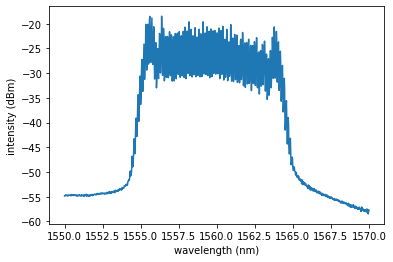

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00119_Cavity_output_FCT_20.52C_FCV_5.139_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00119_Cavity_output_FCT_20.52C_FCV_5.139_RioTset_22.86C_RioTact_23.14C.txt


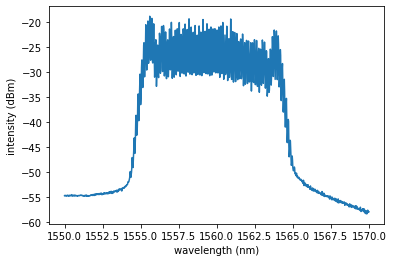

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00120_Cavity_output_FCT_20.52C_FCV_5.163_RioTset_22.86C_RioTact_23.12C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00120_Cavity_output_FCT_20.52C_FCV_5.163_RioTset_22.86C_RioTact_23.12C.txt


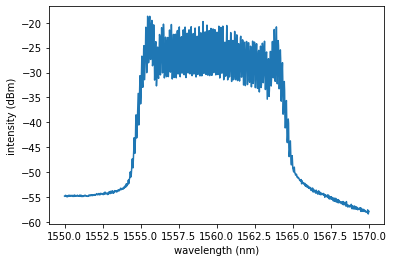

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00121_Cavity_output_FCT_20.52C_FCV_5.179_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00121_Cavity_output_FCT_20.52C_FCV_5.179_RioTset_22.86C_RioTact_23.15C.txt


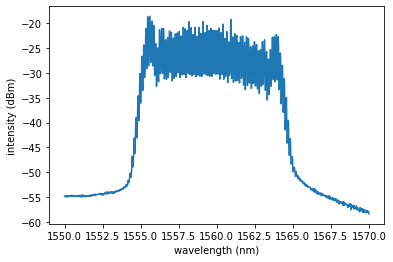

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00122_Cavity_output_FCT_20.52C_FCV_5.226_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00122_Cavity_output_FCT_20.52C_FCV_5.226_RioTset_22.86C_RioTact_23.14C.txt


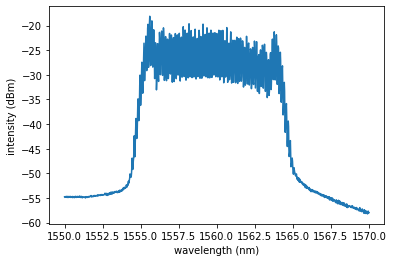

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00123_Cavity_output_FCT_20.52C_FCV_5.304_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00123_Cavity_output_FCT_20.52C_FCV_5.304_RioTset_22.86C_RioTact_23.15C.txt


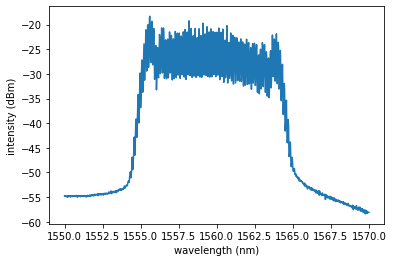

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00124_Cavity_output_FCT_20.52C_FCV_5.239_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00124_Cavity_output_FCT_20.52C_FCV_5.239_RioTset_22.86C_RioTact_23.14C.txt


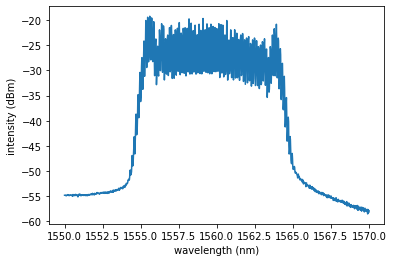

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00125_Cavity_output_FCT_20.52C_FCV_5.295_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00125_Cavity_output_FCT_20.52C_FCV_5.295_RioTset_22.86C_RioTact_23.14C.txt


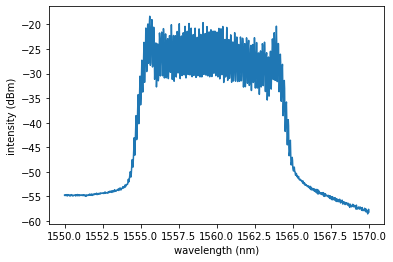

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00126_Cavity_output_FCT_20.52C_FCV_5.342_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00126_Cavity_output_FCT_20.52C_FCV_5.342_RioTset_22.86C_RioTact_23.14C.txt


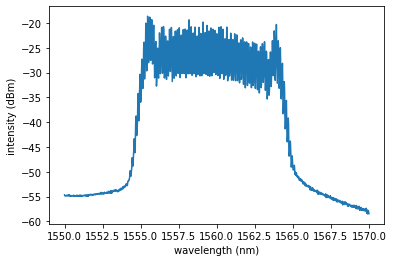

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00127_Cavity_output_FCT_20.52C_FCV_5.384_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00127_Cavity_output_FCT_20.52C_FCV_5.384_RioTset_22.86C_RioTact_23.14C.txt


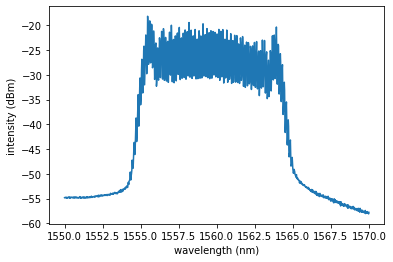

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00128_Cavity_output_FCT_20.52C_FCV_5.386_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00128_Cavity_output_FCT_20.52C_FCV_5.386_RioTset_22.86C_RioTact_23.14C.txt


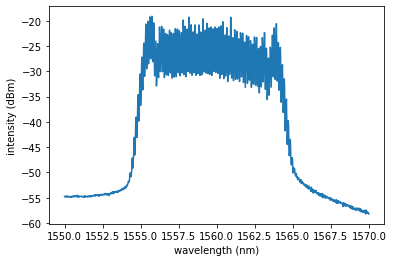

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00129_Cavity_output_FCT_20.52C_FCV_5.438_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00129_Cavity_output_FCT_20.52C_FCV_5.438_RioTset_22.86C_RioTact_23.14C.txt


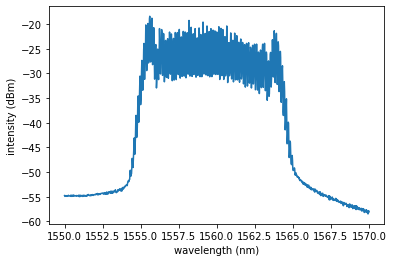

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00130_Cavity_output_FCT_20.52C_FCV_5.528_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00130_Cavity_output_FCT_20.52C_FCV_5.528_RioTset_22.86C_RioTact_23.14C.txt


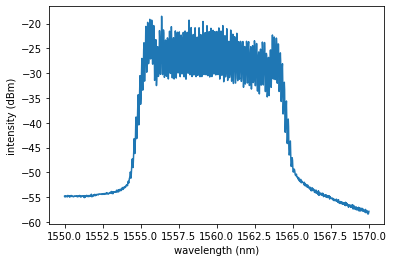

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00131_Cavity_output_FCT_20.52C_FCV_5.496_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00131_Cavity_output_FCT_20.52C_FCV_5.496_RioTset_22.86C_RioTact_23.14C.txt


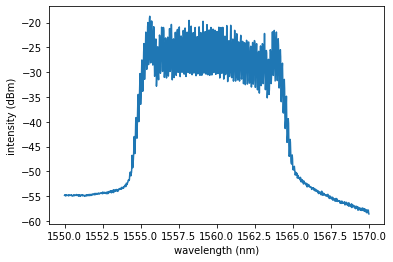

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00132_Cavity_output_FCT_20.52C_FCV_5.501_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00132_Cavity_output_FCT_20.52C_FCV_5.501_RioTset_22.86C_RioTact_23.14C.txt


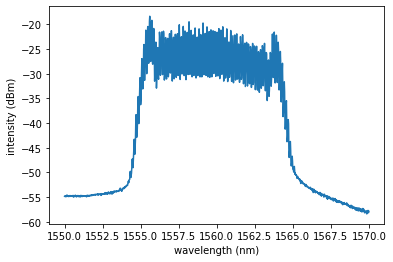

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00133_Cavity_output_FCT_20.52C_FCV_5.572_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00133_Cavity_output_FCT_20.52C_FCV_5.572_RioTset_22.86C_RioTact_23.15C.txt


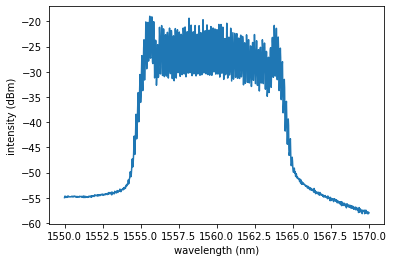

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00134_Cavity_output_FCT_20.52C_FCV_5.588_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00134_Cavity_output_FCT_20.52C_FCV_5.588_RioTset_22.86C_RioTact_23.13C.txt


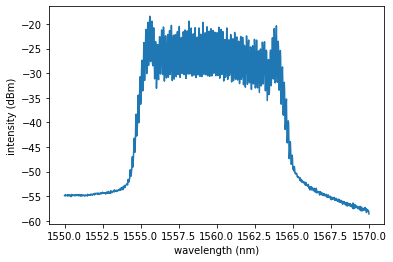

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00135_Cavity_output_FCT_20.52C_FCV_5.667_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00135_Cavity_output_FCT_20.52C_FCV_5.667_RioTset_22.86C_RioTact_23.14C.txt


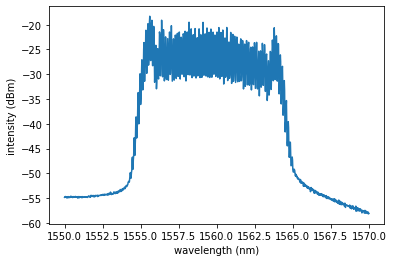

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00136_Cavity_output_FCT_20.52C_FCV_5.645_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00136_Cavity_output_FCT_20.52C_FCV_5.645_RioTset_22.86C_RioTact_23.14C.txt


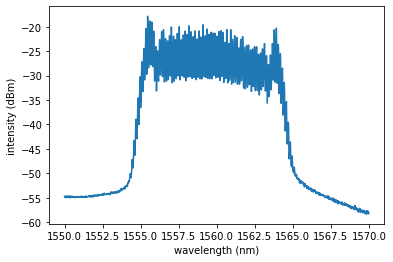

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00137_Cavity_output_FCT_20.52C_FCV_5.682_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00137_Cavity_output_FCT_20.52C_FCV_5.682_RioTset_22.86C_RioTact_23.15C.txt


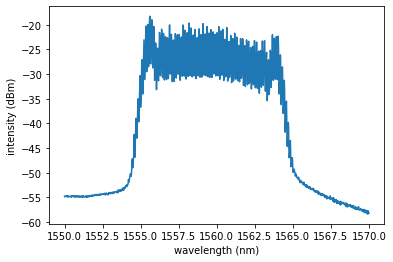

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00138_Cavity_output_FCT_20.52C_FCV_5.724_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00138_Cavity_output_FCT_20.52C_FCV_5.724_RioTset_22.86C_RioTact_23.14C.txt


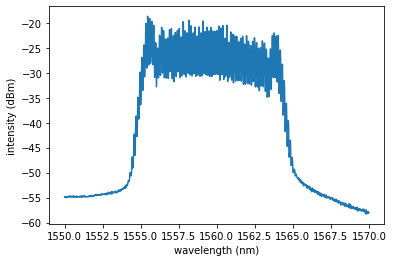

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00139_Cavity_output_FCT_20.52C_FCV_5.780_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00139_Cavity_output_FCT_20.52C_FCV_5.780_RioTset_22.86C_RioTact_23.15C.txt


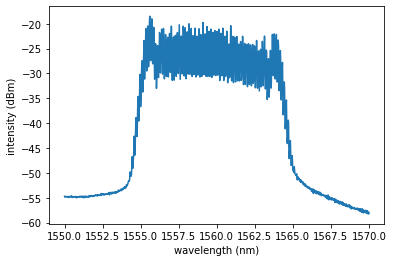

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00140_Cavity_output_FCT_20.52C_FCV_5.850_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00140_Cavity_output_FCT_20.52C_FCV_5.850_RioTset_22.86C_RioTact_23.15C.txt


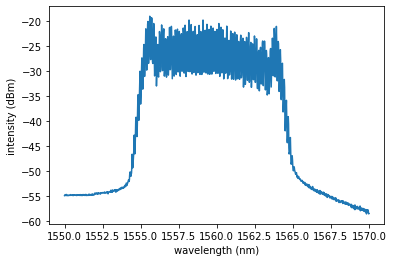

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00141_Cavity_output_FCT_20.52C_FCV_5.881_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00141_Cavity_output_FCT_20.52C_FCV_5.881_RioTset_22.86C_RioTact_23.13C.txt


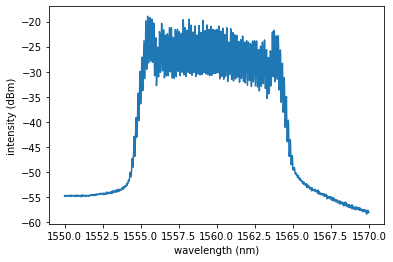

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00142_Cavity_output_FCT_20.52C_FCV_5.905_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00142_Cavity_output_FCT_20.52C_FCV_5.905_RioTset_22.86C_RioTact_23.14C.txt


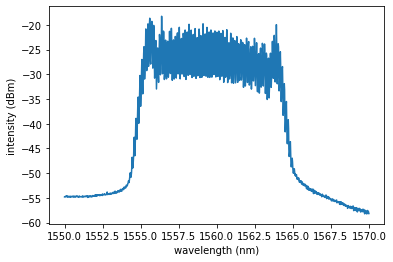

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00143_Cavity_output_FCT_20.52C_FCV_5.895_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00143_Cavity_output_FCT_20.52C_FCV_5.895_RioTset_22.86C_RioTact_23.15C.txt


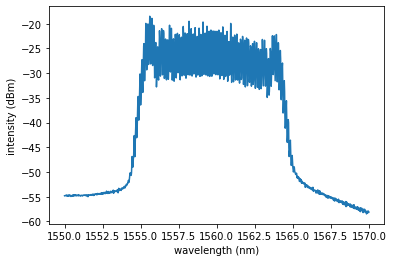

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00144_Cavity_output_FCT_20.52C_FCV_5.919_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00144_Cavity_output_FCT_20.52C_FCV_5.919_RioTset_22.86C_RioTact_23.14C.txt


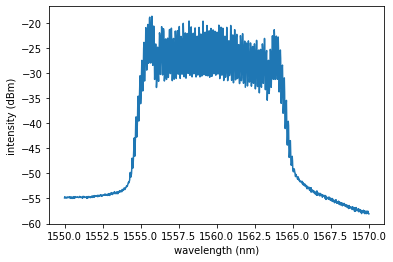

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00145_Cavity_output_FCT_20.52C_FCV_5.918_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00145_Cavity_output_FCT_20.52C_FCV_5.918_RioTset_22.86C_RioTact_23.14C.txt


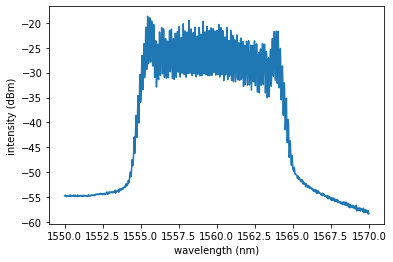

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00146_Cavity_output_FCT_20.52C_FCV_5.944_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00146_Cavity_output_FCT_20.52C_FCV_5.944_RioTset_22.86C_RioTact_23.14C.txt


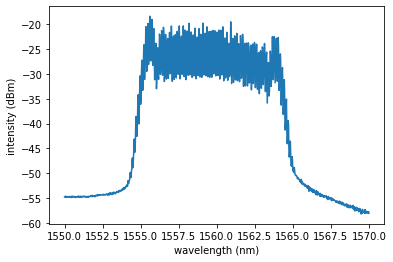

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00147_Cavity_output_FCT_20.52C_FCV_5.958_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00147_Cavity_output_FCT_20.52C_FCV_5.958_RioTset_22.86C_RioTact_23.14C.txt


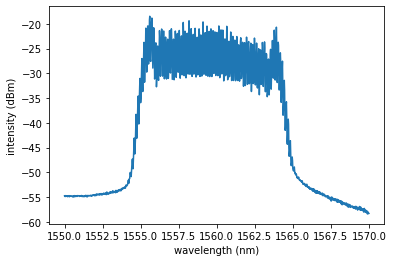

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00148_Cavity_output_FCT_20.52C_FCV_6.059_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00148_Cavity_output_FCT_20.52C_FCV_6.059_RioTset_22.86C_RioTact_23.14C.txt


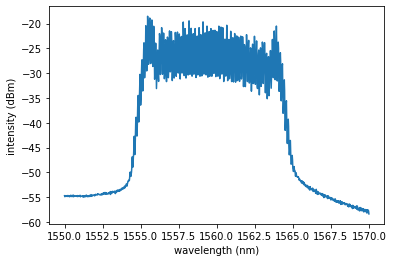

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00149_Cavity_output_FCT_20.52C_FCV_6.042_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00149_Cavity_output_FCT_20.52C_FCV_6.042_RioTset_22.86C_RioTact_23.14C.txt


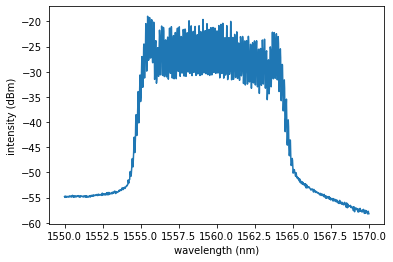

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00150_Cavity_output_FCT_20.52C_FCV_6.112_RioTset_22.86C_RioTact_23.16C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00150_Cavity_output_FCT_20.52C_FCV_6.112_RioTset_22.86C_RioTact_23.16C.txt


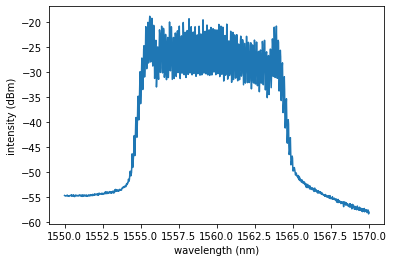

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00151_Cavity_output_FCT_20.52C_FCV_6.153_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00151_Cavity_output_FCT_20.52C_FCV_6.153_RioTset_22.86C_RioTact_23.15C.txt


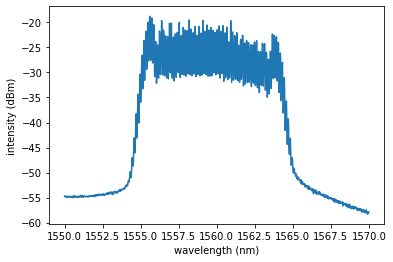

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00152_Cavity_output_FCT_20.52C_FCV_6.176_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00152_Cavity_output_FCT_20.52C_FCV_6.176_RioTset_22.86C_RioTact_23.14C.txt


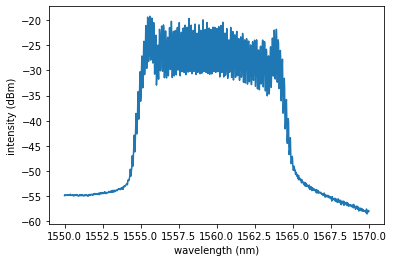

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00153_Cavity_output_FCT_20.52C_FCV_6.223_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00153_Cavity_output_FCT_20.52C_FCV_6.223_RioTset_22.86C_RioTact_23.14C.txt


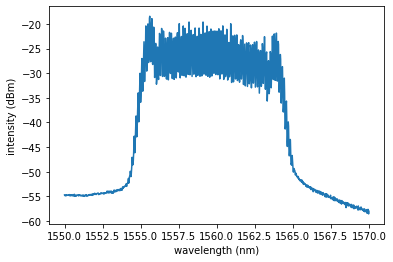

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00154_Cavity_output_FCT_20.52C_FCV_6.264_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00154_Cavity_output_FCT_20.52C_FCV_6.264_RioTset_22.86C_RioTact_23.14C.txt


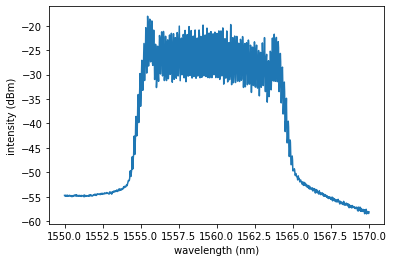

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00155_Cavity_output_FCT_20.52C_FCV_6.231_RioTset_22.86C_RioTact_23.12C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00155_Cavity_output_FCT_20.52C_FCV_6.231_RioTset_22.86C_RioTact_23.12C.txt


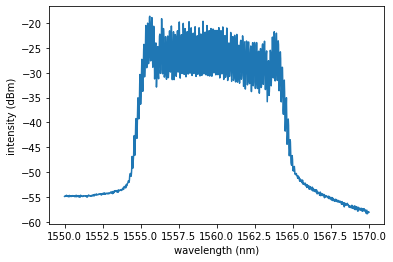

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00156_Cavity_output_FCT_20.52C_FCV_6.310_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00156_Cavity_output_FCT_20.52C_FCV_6.310_RioTset_22.86C_RioTact_23.15C.txt


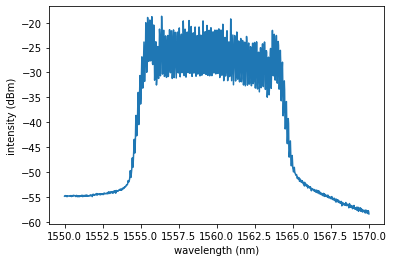

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00157_Cavity_output_FCT_20.52C_FCV_6.365_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00157_Cavity_output_FCT_20.52C_FCV_6.365_RioTset_22.86C_RioTact_23.13C.txt


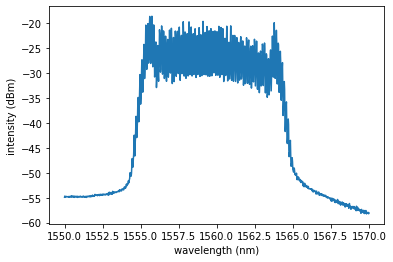

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00158_Cavity_output_FCT_20.52C_FCV_6.396_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00158_Cavity_output_FCT_20.52C_FCV_6.396_RioTset_22.86C_RioTact_23.15C.txt


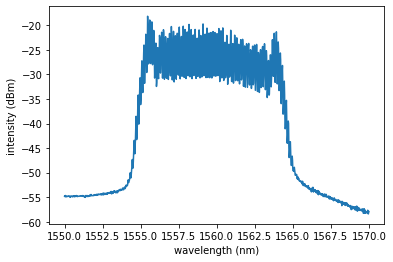

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00159_Cavity_output_FCT_20.52C_FCV_6.345_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00159_Cavity_output_FCT_20.52C_FCV_6.345_RioTset_22.86C_RioTact_23.14C.txt


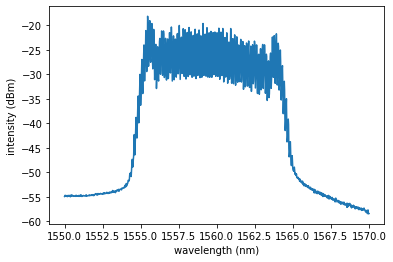

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00160_Cavity_output_FCT_20.52C_FCV_6.408_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00160_Cavity_output_FCT_20.52C_FCV_6.408_RioTset_22.86C_RioTact_23.13C.txt


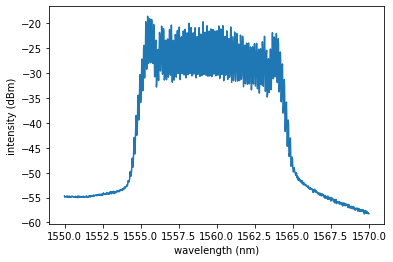

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00161_Cavity_output_FCT_20.52C_FCV_6.391_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00161_Cavity_output_FCT_20.52C_FCV_6.391_RioTset_22.86C_RioTact_23.14C.txt


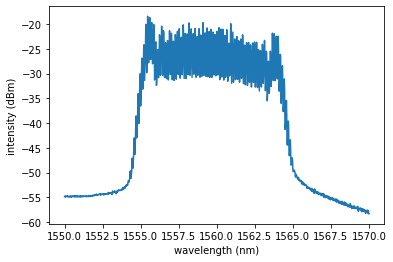

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00162_Cavity_output_FCT_20.52C_FCV_6.454_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00162_Cavity_output_FCT_20.52C_FCV_6.454_RioTset_22.86C_RioTact_23.14C.txt


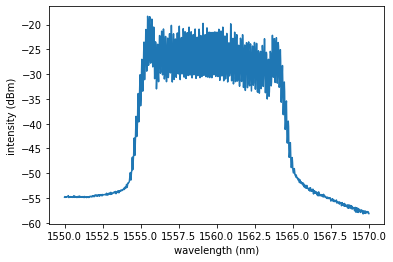

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00163_Cavity_output_FCT_20.52C_FCV_6.501_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00163_Cavity_output_FCT_20.52C_FCV_6.501_RioTset_22.86C_RioTact_23.13C.txt


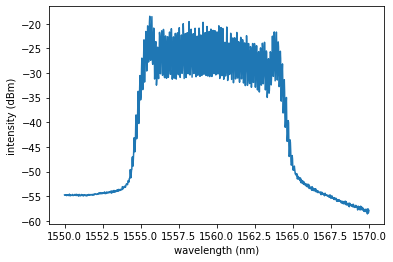

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00164_Cavity_output_FCT_20.52C_FCV_6.560_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00164_Cavity_output_FCT_20.52C_FCV_6.560_RioTset_22.86C_RioTact_23.15C.txt


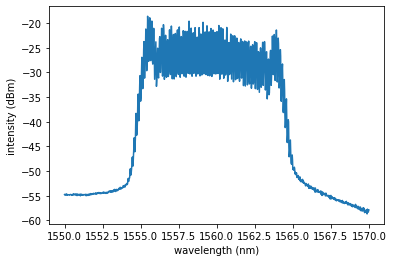

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00165_Cavity_output_FCT_20.52C_FCV_6.597_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00165_Cavity_output_FCT_20.52C_FCV_6.597_RioTset_22.86C_RioTact_23.14C.txt


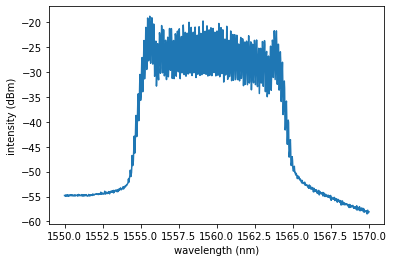

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00166_Cavity_output_FCT_20.52C_FCV_6.612_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00166_Cavity_output_FCT_20.52C_FCV_6.612_RioTset_22.86C_RioTact_23.14C.txt


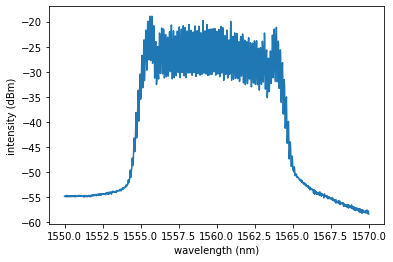

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00167_Cavity_output_FCT_20.52C_FCV_6.602_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00167_Cavity_output_FCT_20.52C_FCV_6.602_RioTset_22.86C_RioTact_23.13C.txt


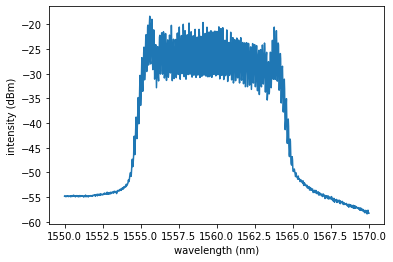

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00168_Cavity_output_FCT_20.52C_FCV_6.623_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00168_Cavity_output_FCT_20.52C_FCV_6.623_RioTset_22.86C_RioTact_23.13C.txt


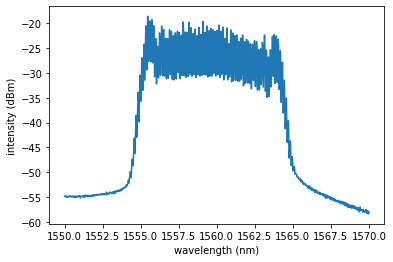

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00169_Cavity_output_FCT_20.52C_FCV_6.647_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00169_Cavity_output_FCT_20.52C_FCV_6.647_RioTset_22.86C_RioTact_23.15C.txt


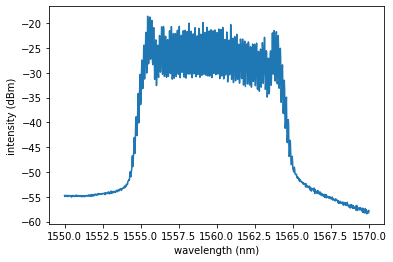

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00170_Cavity_output_FCT_20.52C_FCV_6.751_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00170_Cavity_output_FCT_20.52C_FCV_6.751_RioTset_22.86C_RioTact_23.15C.txt


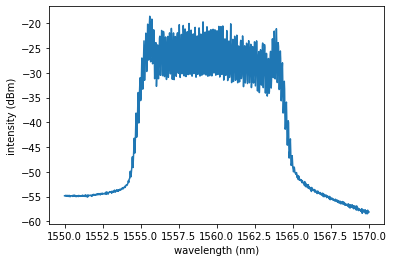

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00171_Cavity_output_FCT_20.52C_FCV_6.725_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00171_Cavity_output_FCT_20.52C_FCV_6.725_RioTset_22.86C_RioTact_23.13C.txt


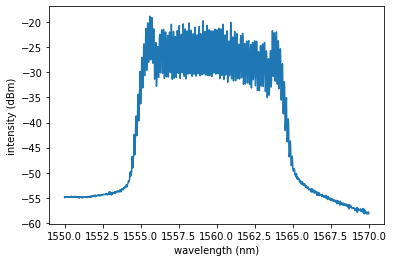

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00172_Cavity_output_FCT_20.52C_FCV_6.795_RioTset_22.86C_RioTact_23.12C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00172_Cavity_output_FCT_20.52C_FCV_6.795_RioTset_22.86C_RioTact_23.12C.txt


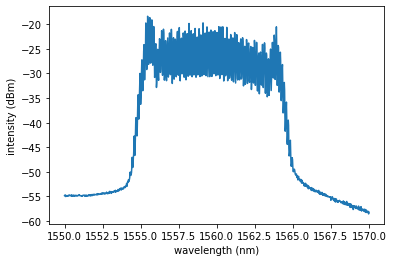

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00173_Cavity_output_FCT_20.52C_FCV_6.788_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00173_Cavity_output_FCT_20.52C_FCV_6.788_RioTset_22.86C_RioTact_23.13C.txt


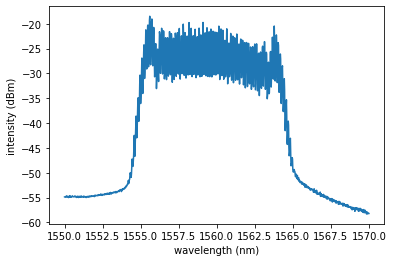

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00174_Cavity_output_FCT_20.52C_FCV_6.845_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00174_Cavity_output_FCT_20.52C_FCV_6.845_RioTset_22.86C_RioTact_23.13C.txt


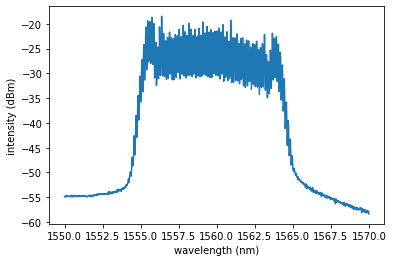

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00175_Cavity_output_FCT_20.52C_FCV_6.828_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00175_Cavity_output_FCT_20.52C_FCV_6.828_RioTset_22.86C_RioTact_23.14C.txt


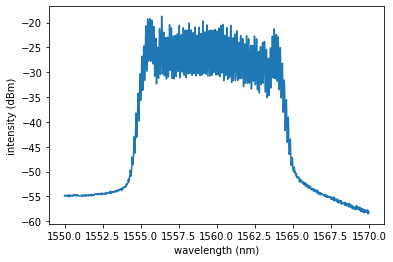

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00176_Cavity_output_FCT_20.52C_FCV_6.833_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00176_Cavity_output_FCT_20.52C_FCV_6.833_RioTset_22.86C_RioTact_23.14C.txt


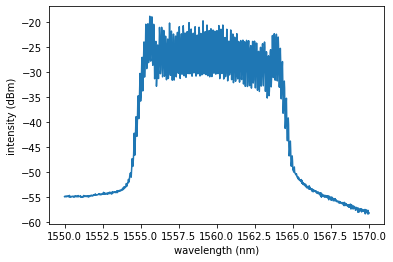

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00177_Cavity_output_FCT_20.52C_FCV_6.823_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00177_Cavity_output_FCT_20.52C_FCV_6.823_RioTset_22.86C_RioTact_23.13C.txt


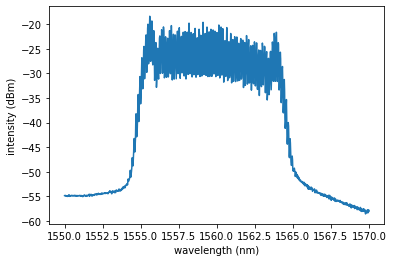

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00178_Cavity_output_FCT_20.52C_FCV_6.907_RioTset_22.86C_RioTact_23.13C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00178_Cavity_output_FCT_20.52C_FCV_6.907_RioTset_22.86C_RioTact_23.13C.txt


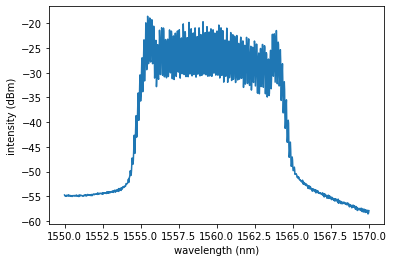

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00179_Cavity_output_FCT_20.52C_FCV_6.911_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00179_Cavity_output_FCT_20.52C_FCV_6.911_RioTset_22.86C_RioTact_23.14C.txt


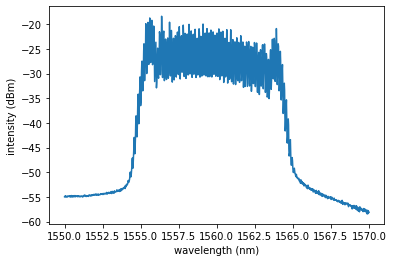

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00180_Cavity_output_FCT_20.52C_FCV_6.981_RioTset_22.86C_RioTact_23.15C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00180_Cavity_output_FCT_20.52C_FCV_6.981_RioTset_22.86C_RioTact_23.15C.txt


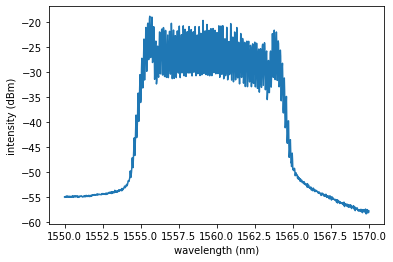

ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is collected and is shown in the plot.
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00181_Cavity_output_FCT_20.52C_FCV_7.024_RioTset_22.86C_RioTact_23.14C.mat
ANDO AQ-6315E Optical Spectrum Analyzer: Trace B data is saved to Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS\overnightRun_1\00181_Cavity_output_FCT_20.52C_FCV_7.024_RioTset_22.86C_RioTact_23.14C.txt
FC locking PID controller: Setting Output in Manual Mode in Volt to 0.0.
FC locking PID controller: output mode 0 is understood as Manual mode.
FC locking PID controller: PID output is turned OFF, output mode is turnd to Manual.
UNLOCKED!


In [33]:
import time
filedir_global = r"Z:\Maodong\Projects\Keck\Filter Cavity test\20220824-LockToFC-useSRS" + "\\"
osa.stoposa()
for ii in range(100000):
    trace = 'b'
    file_subfolder =  'overnightRun_1\\'
    try:
        filename = str(ii).zfill(5)+f"_Cavity_output_FCT_{tec.Tact:.2f}C_FCV_{servo2.output_voltage:.3f}_RioTset_{rio.readTECsetpoint():.2f}C_RioTact_{rio.readThermisTemp():.2f}C"
        osa.save_trace(trace, filedir_global+file_subfolder+filename)
#         if np.abs(servo2.output_voltage-servo2.outoffset)>0.1:
#             print("\x1b[1;34;42m" + "Servo Offset Reset!" + "\x1b[0m")
#             servo2.manual_output=servo2.output_voltage
#             servo2.output_mode = 0
#             servo2.outoffset = servo2.manual_output
#             servo2.output_mode = 1
        # if np.abs(servo2.output_voltage-6)<1 | np.abs(servo2.output_voltage-(-6))<1 :
        if np.abs(servo2.output_voltage)>7:
            servo2.manual_output=0
            servo2.output_mode=0
            print("UNLOCKED!")
            break
        time.sleep(30)
    except:
        pass


In [19]:
np.abs(servo2.output_voltage-servo2.outoffset)

0.07002599999999992

In [67]:
np.linspace(10,3,30)

array([10.        ,  9.75862069,  9.51724138,  9.27586207,  9.03448276,
        8.79310345,  8.55172414,  8.31034483,  8.06896552,  7.82758621,
        7.5862069 ,  7.34482759,  7.10344828,  6.86206897,  6.62068966,
        6.37931034,  6.13793103,  5.89655172,  5.65517241,  5.4137931 ,
        5.17241379,  4.93103448,  4.68965517,  4.44827586,  4.20689655,
        3.96551724,  3.72413793,  3.48275862,  3.24137931,  3.        ])

From here we do amplitude locking 
=====

\begin{equation}
blabla
\end{equation}

In [10]:
from LFC.Hardware.SRS_SIM900 import SRS_SIM900, SRS_PIDcontrol_SIM960
import numpy as np

srs = SRS_SIM900(addr='ASRL21::INSTR')
srs.connect()
servo2 = SRS_PIDcontrol_SIM960(srs,3,name="FC locking PID controller")

Stanford Research System SIM900 connected


FC locking PID controller: PID output is turned OFF, output mode is turnd to Manual.


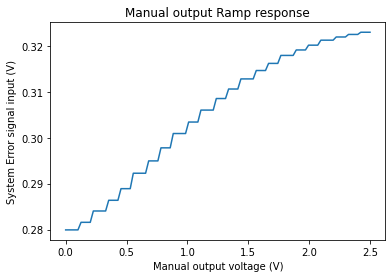

In [14]:
# servo2.printStatus()
voltage_list = np.linspace(0,2.5,100)
r = servo2.manual_sweep(voltage_list, start_pause=0.5, interval_pause=0.1)

In [15]:
servo2.manual_output_ramp=0.1
servo2.manual_output = 1.2

FC locking PID controller: Manual output voltage Ramping. Disable this by set self.manual_output_ramp=0. 
Output in Manual Mode in Volt set to 2.500.
Output in Manual Mode in Volt set to 2.392.
Output in Manual Mode in Volt set to 2.283.
Output in Manual Mode in Volt set to 2.175.
Output in Manual Mode in Volt set to 2.067.
Output in Manual Mode in Volt set to 1.958.
Output in Manual Mode in Volt set to 1.850.
Output in Manual Mode in Volt set to 1.742.
Output in Manual Mode in Volt set to 1.633.
Output in Manual Mode in Volt set to 1.525.
Output in Manual Mode in Volt set to 1.417.
Output in Manual Mode in Volt set to 1.308.
Output in Manual Mode in Volt set to 1.200.


In [26]:
servo2.setpoint = 0.307

FC locking PID controller: Setting Locking set point in Volt to 0.307.


In [27]:
servo2.outoffset = 1.2

FC locking PID controller: Setting Output offset in Volts to 1.2.


In [28]:
servo2.outoffset_action =1

FC locking PID controller: Output Offset Calculator action is set to ON.


In [29]:
servo2.prop_gain=10

FC locking PID controller: Setting Proportional Gain in V/V to 10.0.


In [30]:
servo2.prop_action

'ON'

In [31]:
servo2.output_mode=1

FC locking PID controller: output mode 1 is understood as PID mode.
FC locking PID controller: PID output is turned ON.
